In [1]:
# ignoring some warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
df = pd.read_csv('Patients_Dataset.csv')
df.head()

id           name  gender   age  weight_kg  height_cm  \
0  62632   Samual Sipes    male  29.0      168.0      186.0   
1  63150      Beau Dach    male  19.0       90.0      200.0   
2  71366  Youlanda Metz  female  20.0       75.0      174.0   
3  63734  Deandre Walsh    male  43.0      102.0      181.0   
4  65619  Rhett Douglas    male  20.0       91.0      170.0   

                 education        marital  income insurance  ... insulin  \
0              preparatory  never married     5.0        no  ...  106.48   
1                      NaN            NaN    15.0       yes  ...     NaN   
2    college or equivalent  never married     3.0       yes  ...     NaN   
3    college or equivalent       divorced     2.0        no  ...     NaN   
4  secondary or equivalent  never married     8.0        no  ...     NaN   

    iron  u_acid  s_cotinine    cpk    ldh     fvc    fev1 fev1_fvc_ratio  \
0   63.0     7.2     159.000  251.0  170.0  5426.0  4434.0       0.817177   
1   83.0     7.3      14.700   99.0  102.0  7175.0  5786.0       0.806411   
2  118.0     4.1       0.011  211.0  142.0  5120.0  4570.0       0.892578   
3   55.0     4.7       0.766  312.0  109.0     NaN     NaN            NaN   
4   62.0     5.7       0.376  163.0  123.0  3870.0  3297.0       0.851938   

  memory  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  

[5 rows x 66 columns]

In [4]:
df.drop(['name'], axis=True, inplace=True)

In [5]:
df.shape

(7821, 65)

# Data wrangling

## 1- replacing null cells in categorical features with unknown:

In [6]:
#gender
df['gender'][df.gender.isna()] = 'unknown'

#education
df['education'][df.education.isna()] = 'unknown'

#marital
df['marital'][df.marital.isna()] = 'unknown'

# income
df['income'][df.income.isna()] = 'unknown'
df['income'][df.income == 1] = '$0 to $4,999'
df['income'][df.income == 2] = '$5k to $9,999'
df['income'][df.income == 3] = '$10k to $14,999'
df['income'][df.income == 4] = '$15k to $19,999'
df['income'][df.income == 5] = '$20k to $24,999'
df['income'][df.income == 6] = '$25k to $34,999'
df['income'][df.income == 7] = '$35k to $44,999'
df['income'][df.income == 8] = '$45k to $54,999'
df['income'][df.income == 9] = '$55k to $64,999'
df['income'][df.income == 10] = '$65k to $74,999'
df['income'][df.income == 14] = '$75k to $99,999'
df['income'][df.income == 15] = '$100k and Over'

#insurance
df['insurance'][df.insurance.isna()] = 'unknown'

#gen_health
df['gen_health'][df.gen_health.isna()] = 'unknown'

#smoker
df['smoker'][df.smoker.isna()] = 'unknown'

#days_active
df['days_active'][df.days_active == 0.0] = '0'
df['days_active'][df.days_active == 1.0] = '1'
df['days_active'][df.days_active == 2.0] = '2'
df['days_active'][df.days_active == 3.0] = '3'
df['days_active'][df.days_active == 4.0] = '4'
df['days_active'][df.days_active == 5.0] = '5'
df['days_active'][df.days_active == 6.0] = '6'
df['days_active'][df.days_active == 7.0] = '7'
df['days_active'][df.days_active.isna()] = 'unknown'

#asthma
df['asthma'][df.asthma.isna()] = 'unknown'

#chf
df['chf'][df.chf.isna()] = 'unknown'

#cad
df['cad'][df.cad.isna()] = 'unknown'

#mi
df['mi'][df.mi.isna()] = 'unknown'

#cva
df['cva'][df.cva.isna()] = 'unknown'

#copd
df['copd'][df.copd.isna()] = 'unknown'

#cancer
df['cancer'][df.cancer.isna()] = 'unknown'

#  hypertension
df['hypertension'][df.hypertension.isna()] = 'unknown'

#diabetes
df['diabetes'][df.diabetes.isna()] = 'unknown'


## 2- Changing categorical ordinal data to type categoricalDtype:

In [7]:
#gender
Gend_levels = ['female', 'male', 'unknown']
gend_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Gend_levels)
df.gender = df.gender.astype(gend_levels)

#education
Edu_levels = ['postgraduate education', 'college or equivalent', 'secondary or equivalent',
             'preparatory', 'less than preparatory', 'unknown']
edu_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Edu_levels)
df.education = df.education.astype(edu_levels)

#marital
Mari_levels = ['married', 'widowed', 'divorced', 'separated', 'never married', 'unknown']
mari_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Mari_levels)
df.marital = df.marital.astype(mari_levels)

#income
Incm_levels = ['unknown', '$0 to $4,999', '$5k to $9,999', '$10k to $14,999', '$15k to $19,999', 
               '$20k to $24,999','$25k to $34,999', '$35k to $44,999', '$45k to $54,999', 
               '$55k to $64,999', '$65k to $74,999', '$75k to $99,999', '$100k and Over']
incm_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Incm_levels)
df.income = df.income.astype(incm_levels)

#insurance
Insur_levels = ['yes', 'no', 'unknown']
insur_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Insur_levels)
df.insurance = df.insurance.astype(insur_levels)

#gen_health
Genh_levels = ['excellent', 'very good', 'good', 'fair', 'poor', 'unknown']
genh_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Genh_levels)
df.gen_health = df.gen_health.astype(genh_levels)

#smoker
Smok_levels = ['yes', 'no', 'unknown']
smok_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Smok_levels)
df.smoker = df.smoker.astype(smok_levels)

#days_active
Dact_levels = ['0', '1', '2', '3', '4', '5', '6', '7', 'unknown']
dact_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Dact_levels)
df.days_active = df.days_active.astype(dact_levels)

#asthma
Asthma_levels = ['yes', 'no', 'unknown']
asthma_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Asthma_levels)
df.asthma = df.asthma.astype(asthma_levels)

#chf
Chf_levels = ['yes', 'no', 'unknown']
chf_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Chf_levels)
df.chf = df.chf.astype(chf_levels)

#cad
Cad_levels = ['yes', 'no', 'unknown']
cad_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Cad_levels)
df.cad = df.cad.astype(cad_levels)

#mi
Mi_levels = ['yes', 'no', 'unknown']
mi_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Mi_levels)
df.mi = df.mi.astype(mi_levels)

#cva
Cva_levels = ['yes', 'no', 'unknown']
cva_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Cva_levels)
df.cva = df.cva.astype(cva_levels)

#copd
Copd_levels = ['yes', 'no', 'unknown']
copd_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Copd_levels)
df.copd = df.copd.astype(copd_levels)

#cancer
Cancer_levels = ['yes', 'no', 'unknown']
cancer_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Cancer_levels)
df.cancer = df.cancer.astype(cancer_levels)

#hypertension
Hypertension_levels = ['yes', 'no', 'hypotension', 'unknown']
hypertension_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Hypertension_levels)
df.hypertension = df.hypertension.astype(hypertension_levels)

#diabetes
Diabetes_levels = ['yes', 'borderline', 'no', 'unknown']
diabetes_levels = pd.api.types.CategoricalDtype(ordered=True, categories=Diabetes_levels)
df.diabetes = df.diabetes.astype(diabetes_levels)

## 3- Clearing all wrong entries in the numerical features of the data

### 1- personal data

In [8]:
# nulling all bmi cells with value greater than 110 or less than 12
df['bmi'][df.bmi > 110] = np.nan
df['bmi'][df.bmi < 12] = np.nan

# nulling all waist_cm cells with value greater than 180 or less than 30
df['waist_cm'][df.waist_cm > 180] = np.nan
df['waist_cm'][df.waist_cm < 30] = np.nan

# nulling all drinks_day cells with value greater than 100 or less than 0
df['drinks_day'][df.drinks_day > 100] = np.nan
df['drinks_day'][df.drinks_day < 0] = np.nan

# nulling all weight_kg cells with value greater than 210 or less than 40
df['weight_kg'][df.weight_kg > 250] = np.nan
df['weight_kg'][df.weight_kg < 0] = np.nan

# nulling all height_cm cells with value greater than 210 or less than 40
df['height_cm'][df.height_cm > 210] = np.nan
df['height_cm'][df.height_cm < 40] = np.nan

### 2- heart rate and blood pressures

In [9]:
# nulling heart rate (pulse) cells with values more 140 or less than 30
df['pulse'][df.pulse > 140] = np.nan
df['pulse'][df.pulse < 30] = np.nan

# nulling blood pressure(sys_bp) cells with values more 250 or less than 65
df['sys_bp'][df.sys_bp > 250] = np.nan
df['sys_bp'][df.sys_bp < 65] = np.nan

# nulling blood pressure(dia_bp) cells with values more 150 or less than 40
df['dia_bp'][df.dia_bp > 150] = np.nan
df['dia_bp'][df.dia_bp < 40] = np.nan


# hypertension and pressure values
# First, we depend on the correct pressure values
df['hypertension'][(df.sys_bp >= 120) &(df.dia_bp >=80)] = 'yes'
df['hypertension'][(df.sys_bp < 120) & (df.sys_bp >= 90) &(df.dia_bp < 80) &(df.dia_bp >=60)] = 'no'
df['hypertension'][(df.sys_bp < 90) &(df.dia_bp < 60)] = 'hypotension'


right_hyper_ids = df['id'][((df.sys_bp >= 120) &(df.dia_bp >=80)) | 
                           ((df.sys_bp < 90) &(df.dia_bp < 60)) | 
                           ((df.sys_bp < 120) & (df.sys_bp >= 90) &(df.dia_bp < 80) &(df.dia_bp >=60))]

df['sys_bp'][~(df.id.isin(right_hyper_ids))] = np.nan
df['dia_bp'][~(df.id.isin(right_hyper_ids))] = np.nan

### 3- Medical Tests

#### a- CBC Test

In [10]:
# nulling white blood count(wbc) cells with values more 100 or less than 1
df['wbc'][df.wbc > 100] = np.nan
df['wbc'][df.wbc < 1] = np.nan

# nulling hemoglobin(hgb) cells with values more 100 or less than 1
df['hgb'][df.hgb > 25] = np.nan
df['hgb'][df.hgb < 5] = np.nan

# nulling hematocrit(hct) cells with values more 80 or less than 15
df['hct'][df.hct > 80] = np.nan
df['hct'][df.hct < 15] = np.nan

# nulling (platelets) cells with values more 80 or less than 5
df['platelets'][df.platelets > 750] = np.nan
df['platelets'][df.platelets < 5] = np.nan

#### b- Liver Function Test (LFT)

In [11]:
# nulling (alt) cells with values less than 1
df['alt'][df.alt > 2000] = np.nan
df['alt'][df.alt < 1] = np.nan

# nulling (ast) cells with values less than 1
df['ast'][df.ast > 2000] = np.nan
df['ast'][df.ast < 1] = np.nan

# nulling (alk_phos) cells with values less than 1
df['alk_phos'][df.alk_phos > 3500] = np.nan
df['alk_phos'][df.alk_phos < 5] = np.nan

#### c- Kidney Function Test (KFT)

In [12]:
# nulling (BUN) cells with values less than 1
df['bun'][df.bun > 110] = np.nan
df['bun'][df.bun < 1] = np.nan

# nulling (Cr) cells with values greater than 10 less than 0.1
df['cr'][df.cr > 10] = np.nan
df['cr'][df.cr < .1] = np.nan

#### d- Comprehensive metabolic panel (CMP)

In [14]:
# nulling (sodium) cells with values greater than 160 less than 90
df['sodium'][df.sodium > 160] = np.nan
df['sodium'][df.sodium < 90] = np.nan

# nulling (potassium) cells with values greater than 10 less than 1.5
df['potassium'][df.potassium > 10] = np.nan
df['potassium'][df.potassium < 1.5] = np.nan

# nulling (bicarb) cells with values greater than 45 less than 10
df['bicarb'][df.bicarb > 45] = np.nan
df['bicarb'][df.bicarb < 10] = np.nan

# nulling (calcium) cells with values greater than 15 less than 5
df['ca'][df.ca > 15] = np.nan
df['ca'][df.ca < 5] = np.nan

# nulling (phosphorus) cells with values greater than 10 less than 1
df['phos'][df.phos > 10] = np.nan
df['phos'][df.phos < 1] = np.nan

# nulling (t_bilirubin) cells with values greater than 5 less than 0
df['t_bilirubin'][df.t_bilirubin > 5] = np.nan
df['t_bilirubin'][df.t_bilirubin < 0] = np.nan

# nulling (alb) cells with values greater than 5 less than 0
df['alb'][df.alb > 7] = np.nan
df['alb'][df.alb < 1] = np.nan

# nulling (t_protein) cells with values greater than 15 less than 1
df['t_protein'][df.t_protein > 15] = np.nan
df['t_protein'][df.t_protein < 1] = np.nan

# nulling (glob) cells with values greater than 10 less than .1
df['glob'][df.glob > 10] = np.nan
df['glob'][df.glob < .1] = np.nan

# nulling (glucose) cells with values greater than 800 less than 1
df['glucose'][df.glucose > 800] = np.nan
df['glucose'][df.glucose < 1] = np.nan

# nulling (glucose.1) cells with values greater than 500 less than 1
df['glucose.1'][df['glucose.1'] > 500] = np.nan
df['glucose.1'][df['glucose.1'] < 1] = np.nan

# Medical Tests Analysis:

## 1-Complete Blood Count (CBC)
> wbc, hgb, hct, platelets

### wbc

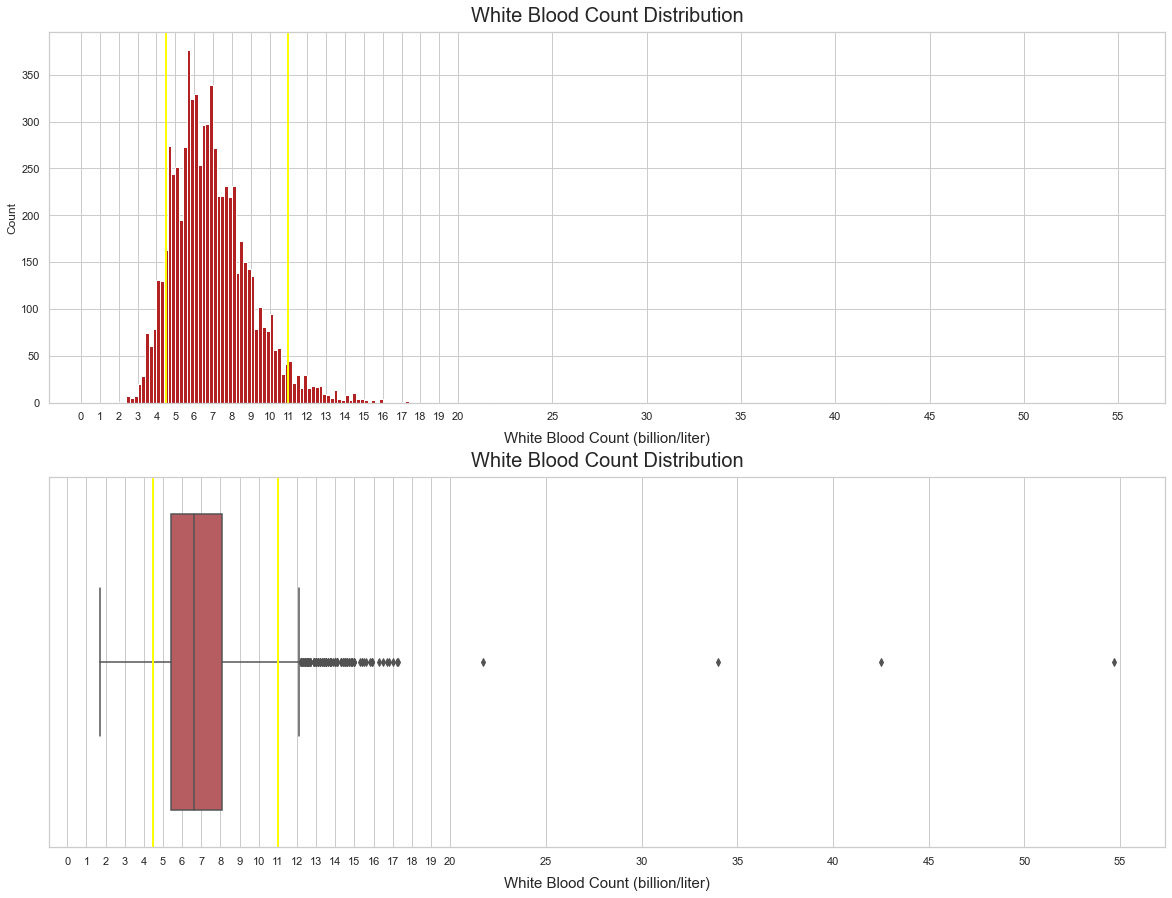

In [17]:
plt.figure(figsize=[20,15])
sb.set_theme(style='whitegrid')

plt.subplot(2,1,1)
bins = np.arange(1, df.wbc.max()+.2, .2)
plt.hist(data=df, x='wbc', bins= bins, color='firebrick')

plt.axvline(x= 4.5, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 11, linestyle='-', linewidth=2, color='yellow', alpha=.99)

ticks = np.arange(0, df.wbc.max()+5, 5)
ticks = np.append(ticks, [1,2,3,4,6,7,8,9,11,12,13,14,16,17,18,19])
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('White Blood Count Distribution', pad=10, fontsize=20)
plt.xlabel('White Blood Count (billion/liter)', labelpad=10, fontsize=15)
plt.ylabel('Count');


plt.subplot(2,1,2)

sb.boxplot(data=df, x='wbc', color='r')

plt.axvline(x=4.5, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x=11, linestyle='-', linewidth=2, color='yellow', alpha=.99)

ticks = np.arange(0, df.wbc.max()+5, 5)
ticks = np.append(ticks, [1,2,3,4,6,7,8,9,11,12,13,14,16,17,18,19])
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('White Blood Count Distribution', pad=10, fontsize=20)
plt.xlabel('White Blood Count (billion/liter)', labelpad=10, fontsize=15)
plt.ylabel('');

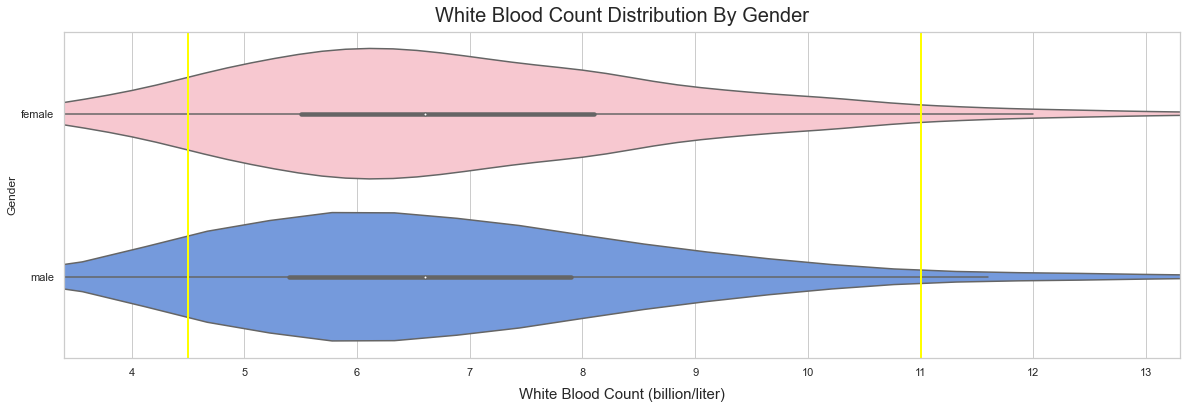

In [18]:
plt.figure(figsize=[20,6])
sb.set_theme(style='whitegrid')

sb.violinplot(data=df, x='wbc', y='gender', order=['female', 'male'], orient='horizontal', palette=['pink', 'cornflowerblue']);

plt.axvline(x=4.5, linestyle='-', linewidth=2, color='yellow', alpha=1)
plt.axvline(x=11, linestyle='-', linewidth=2, color='yellow', alpha=1)

ticks = np.arange(0, df.wbc.max()+5, 5)
ticks = np.append(ticks, [1,2,3,4,6,7,8,9,11,12,13,14,16,17,18,19])
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('White Blood Count Distribution By Gender', pad=10, fontsize=20)
plt.xlabel('White Blood Count (billion/liter)', labelpad=10, fontsize=15)
plt.ylabel('Gender')
plt.xlim(df.wbc.quantile(.01), df.wbc.quantile(.99));

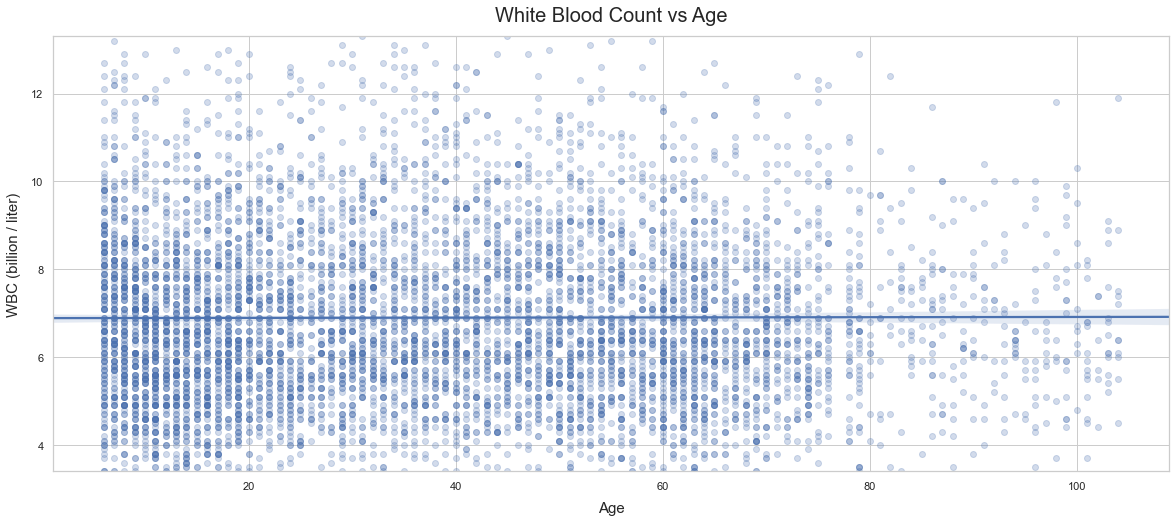

In [21]:
plt.figure(figsize=[20,8])
sb.set_theme(style='whitegrid')

sb.regplot(data=df, x='age', y='wbc', scatter_kws={'alpha':.25}, truncate=False)

plt.title('White Blood Count vs Age', fontsize=20, pad=15)
plt.xlabel('Age', fontsize=15, labelpad=10)
plt.ylabel('WBC (billion / liter)', fontsize=15, labelpad=10)

plt.ylim(df.wbc.quantile(.01), df.wbc.quantile(.99));

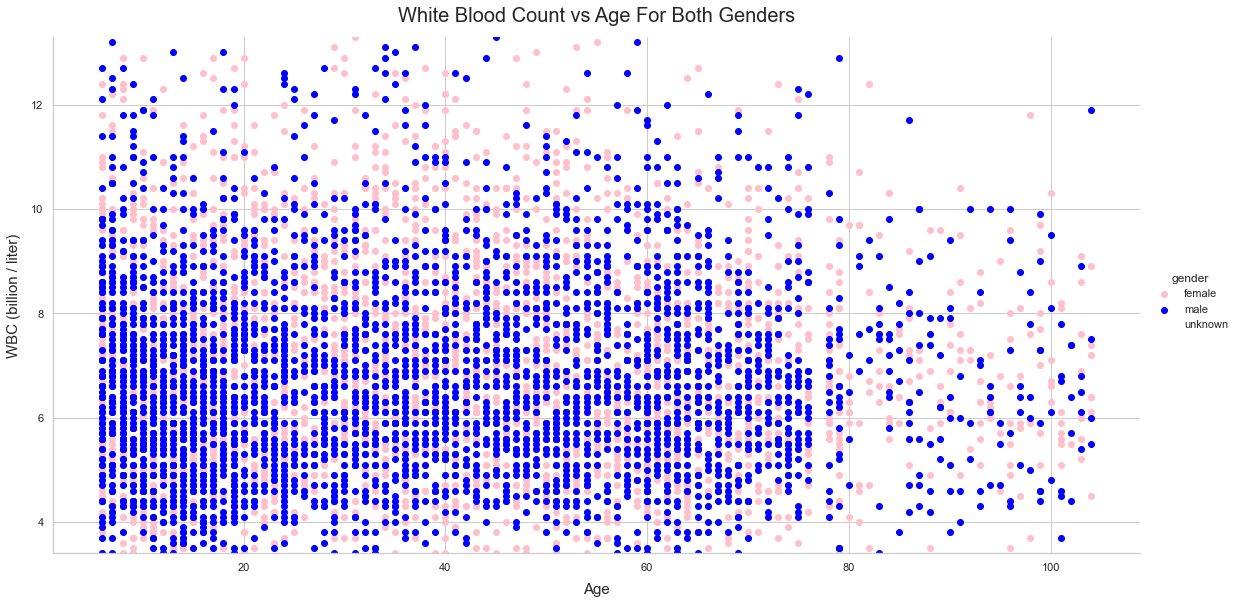

In [22]:
sb.set_theme(style=None)

g = sb.FacetGrid(data=df, hue='gender', height=8, aspect=2, palette=['pink', (0,0,1,.01)])
g.map(plt.scatter, 'age', 'wbc')
g.add_legend()

plt.title('White Blood Count vs Age For Both Genders', fontsize=20, pad=15)
plt.xlabel('Age', fontsize=15, labelpad=10)
plt.ylabel('WBC (billion / liter)', fontsize=15, labelpad=10)
plt.ylim(df.wbc.quantile(.01), df.wbc.quantile(.99));

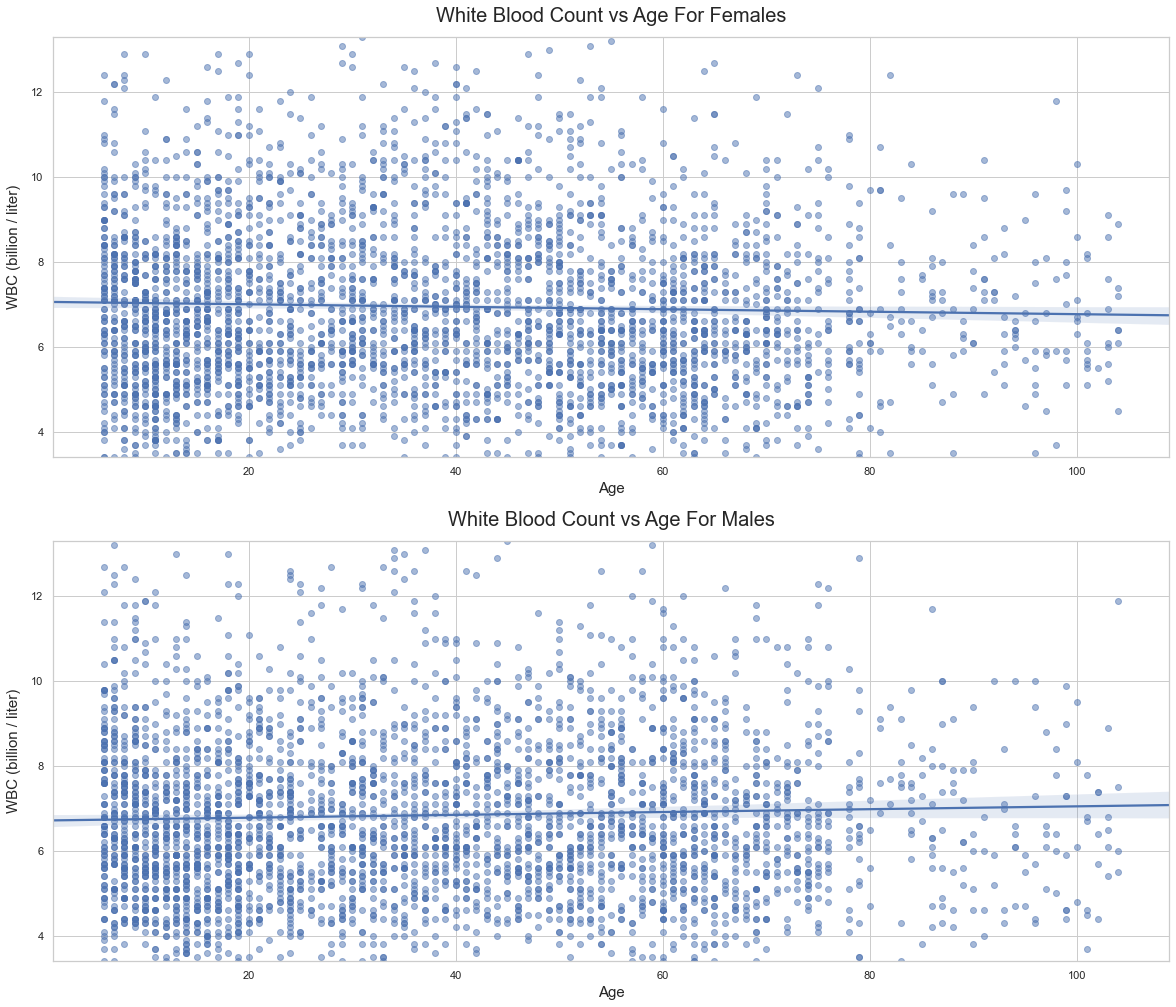

In [23]:
plt.figure(figsize=[20, 17])
sb.set_theme(style=None)

plt.subplot(2,1,1)
sb.regplot(data=df[df.gender == 'female'], x='age', y='wbc', scatter_kws={'alpha':.5}, truncate=False)

plt.title('White Blood Count vs Age For Females', fontsize=20, pad=15)
plt.xlabel('Age', fontsize=15, labelpad=5)
plt.ylabel('WBC (billion / liter)', fontsize=15, labelpad=10)
plt.ylim(df.wbc.quantile(.01), df.wbc.quantile(.99));


plt.subplot(2,1,2)
sb.regplot(data=df[df.gender == 'male'], x='age', y='wbc', scatter_kws={'alpha':.5}, truncate=False)           

plt.title('White Blood Count vs Age For Males', fontsize=20, pad=15)
plt.xlabel('Age', fontsize=15, labelpad=5)
plt.ylabel('WBC (billion / liter)', fontsize=15, labelpad=10)
plt.ylim(df.wbc.quantile(.01), df.wbc.quantile(.99));

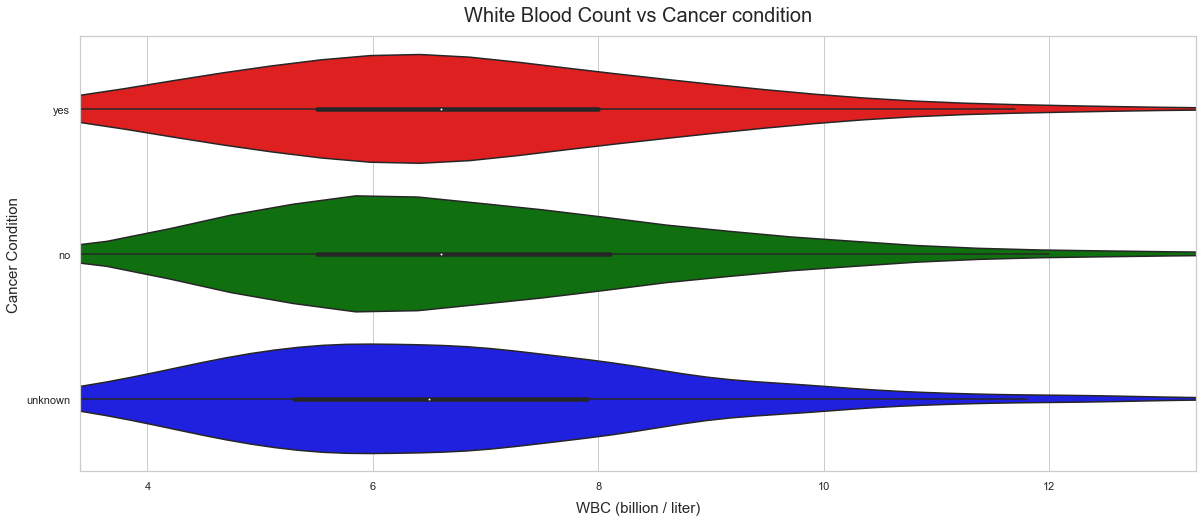

In [24]:
plt.figure(figsize=[20, 8])
sb.set_theme(style=None)

sb.violinplot(data=df, x='wbc', y='cancer', palette=['red', 'green', 'blue'])

plt.title('White Blood Count vs Cancer condition', fontsize=20, pad=15)
plt.ylabel('Cancer Condition', fontsize=15, labelpad=5)
plt.xlabel('WBC (billion / liter)', fontsize=15, labelpad=10);
plt.xlim(df.wbc.quantile(.01), df.wbc.quantile(.99));

### hgb

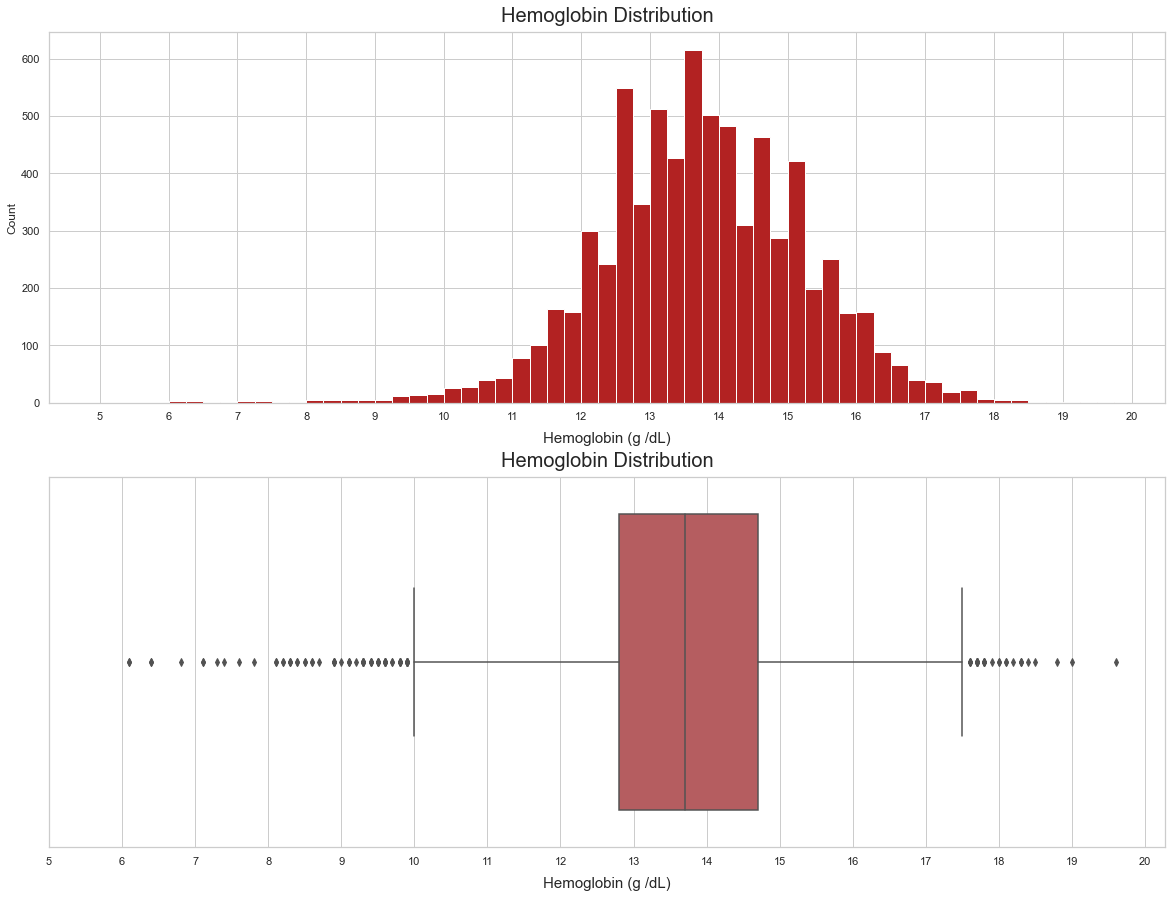

In [25]:
plt.figure(figsize=[20,15])
sb.set_theme(style=None)

plt.subplot(2,1,1)
bins = np.arange(5, df.hgb.max()+.25, .25)
plt.hist(data=df, x='hgb', bins= bins, color='firebrick')

ticks = np.arange(5, df.hgb.max()+1, 1)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Hemoglobin Distribution', pad=10, fontsize=20)
plt.xlabel('Hemoglobin (g /dL)', labelpad=10, fontsize=15)
plt.ylabel('Count');


plt.subplot(2,1,2)
sb.boxplot(data=df, x='hgb', color='r')

ticks = np.arange(5, df.hgb.max()+1, 1)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Hemoglobin Distribution', pad=10, fontsize=20)
plt.xlabel('Hemoglobin (g /dL)', labelpad=10, fontsize=15)
plt.ylabel('');

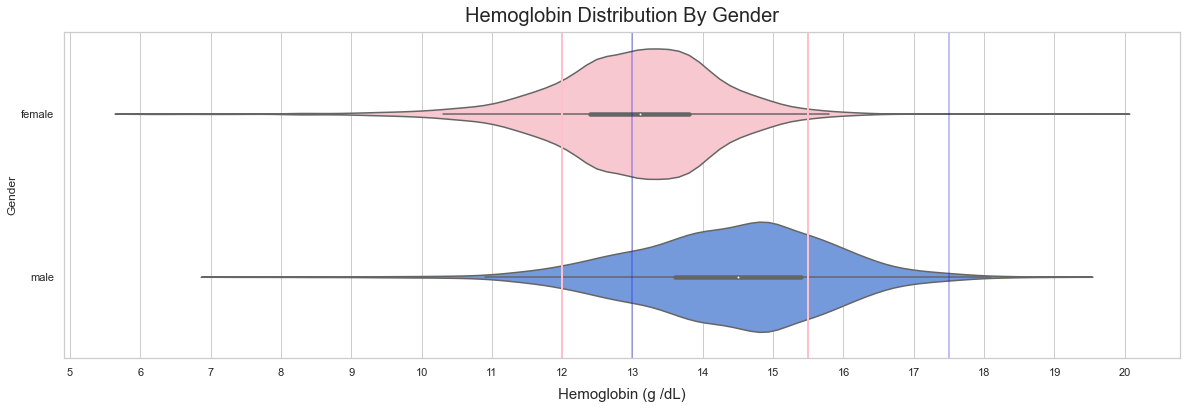

In [26]:
plt.figure(figsize=[20,6])
sb.set_theme(style=None)

sb.violinplot(data=df, x='hgb', y='gender', order=['female', 'male'], orient='horizontal', palette=['pink', 'cornflowerblue']);

plt.axvline(x=12, linestyle='-', linewidth=2, color='pink', alpha=1)
plt.axvline(x=15.5, linestyle='-', linewidth=2, color='pink', alpha=1)
plt.axvline(x=13.0, linestyle='-', linewidth=2, color='blue', alpha=.25)
plt.axvline(x=17.5, linestyle='-', linewidth=2, color='blue', alpha=.25)


ticks = np.arange(5, df.hgb.max()+1, 1)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Hemoglobin Distribution By Gender', pad=10, fontsize=20)
plt.xlabel('Hemoglobin (g /dL)', labelpad=10, fontsize=15)
plt.ylabel('Gender');

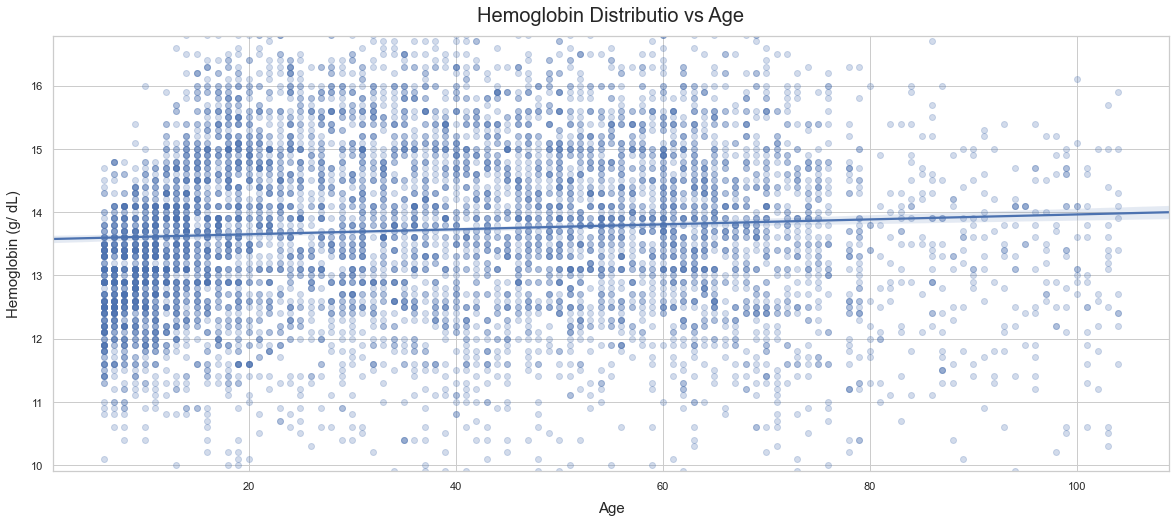

In [27]:
plt.figure(figsize=[20,8])
sb.set_theme(style=None)

sb.regplot(data=df, x='age', y='hgb', scatter_kws={'alpha':.25}, truncate=False)

plt.title('Hemoglobin Distributio vs Age', fontsize=20, pad=15)
plt.xlabel('Age', fontsize=15, labelpad=10)
plt.ylabel('Hemoglobin (g/ dL)', fontsize=15, labelpad=10);

plt.ylim(df.hgb.quantile(.01), df.wbc.quantile(.999));

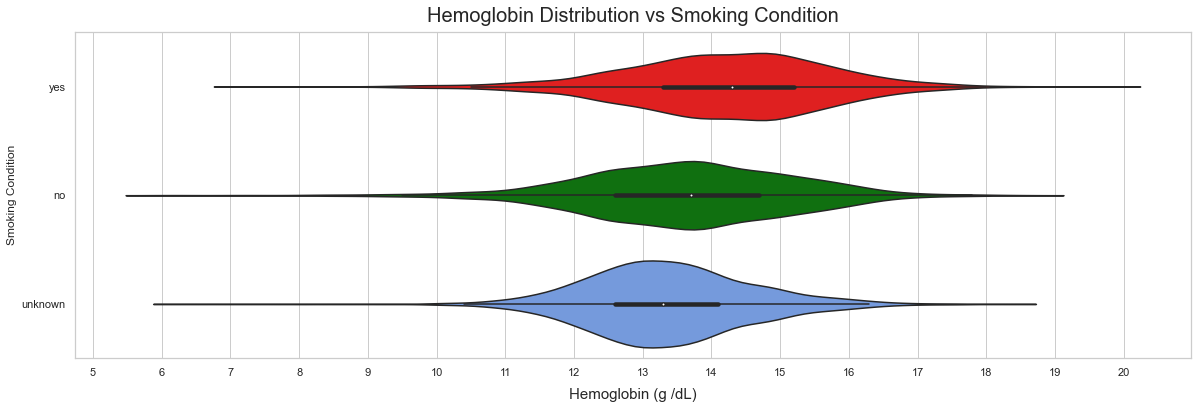

In [28]:
plt.figure(figsize=[20,6])
sb.set_theme(style=None)

sb.violinplot(data=df, x='hgb', y='smoker', orient='horizontal', palette=['red', 'green', 'cornflowerblue']);

ticks = np.arange(5, df.hgb.max()+1, 1)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Hemoglobin Distribution vs Smoking Condition', pad=10, fontsize=20)
plt.xlabel('Hemoglobin (g /dL)', labelpad=10, fontsize=15)
plt.ylabel('Smoking Condition');

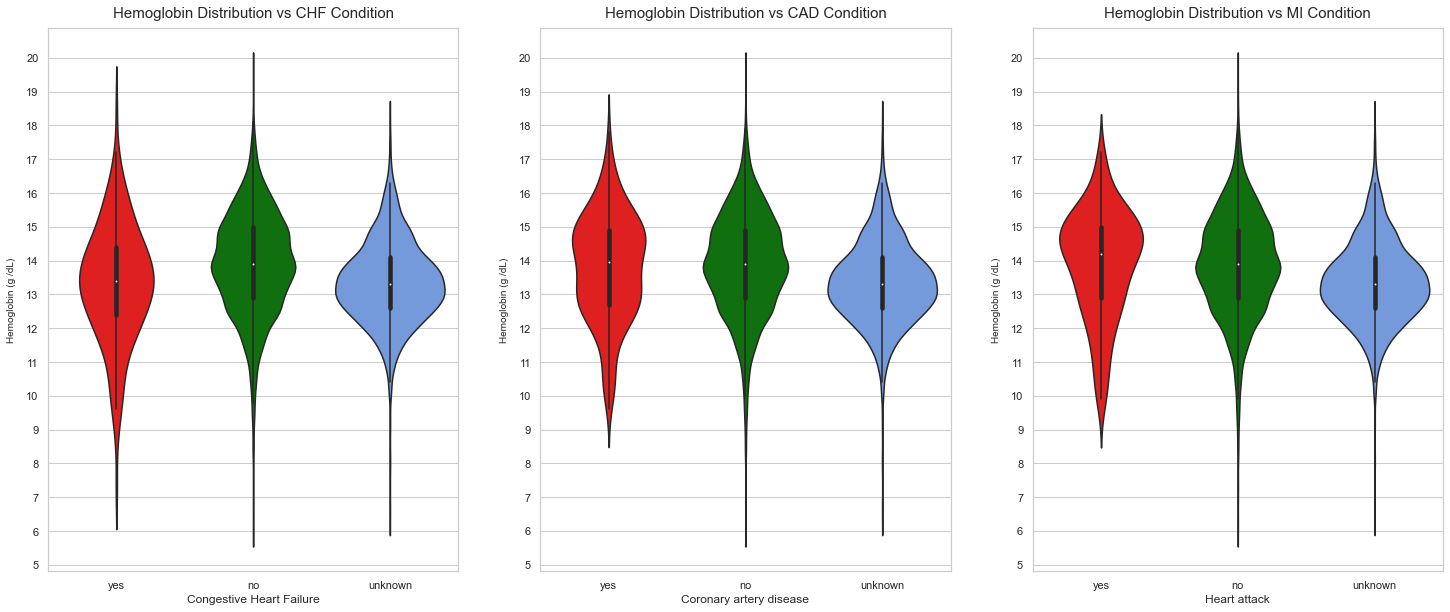

In [29]:
plt.figure(figsize=[25,10])
sb.set_theme(style=None)

plt.subplot(1,3,1)
sb.violinplot(data=df, y='hgb', x='chf', palette=['red', 'green', 'cornflowerblue']);

ticks = np.arange(5, df.hgb.max()+1, 1)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.title('Hemoglobin Distribution vs CHF Condition', pad=10, fontsize=15)
plt.ylabel('Hemoglobin (g /dL)', labelpad=10, fontsize=10)
plt.xlabel('Congestive Heart Failure');

plt.subplot(1,3,2)
sb.violinplot(data=df, y='hgb', x='cad', palette=['red', 'green', 'cornflowerblue']);

ticks = np.arange(5, df.hgb.max()+1, 1)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.title('Hemoglobin Distribution vs CAD Condition', pad=10, fontsize=15)
plt.ylabel('Hemoglobin (g /dL)', labelpad=10, fontsize=10)
plt.xlabel('Coronary artery disease');

plt.subplot(1,3,3)
sb.violinplot(data=df, y='hgb', x='mi', palette=['red', 'green', 'cornflowerblue']);

ticks = np.arange(5, df.hgb.max()+1, 1)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.title('Hemoglobin Distribution vs MI Condition', pad=10, fontsize=15)
plt.ylabel('Hemoglobin (g /dL)', labelpad=10, fontsize=10)
plt.xlabel('Heart attack');

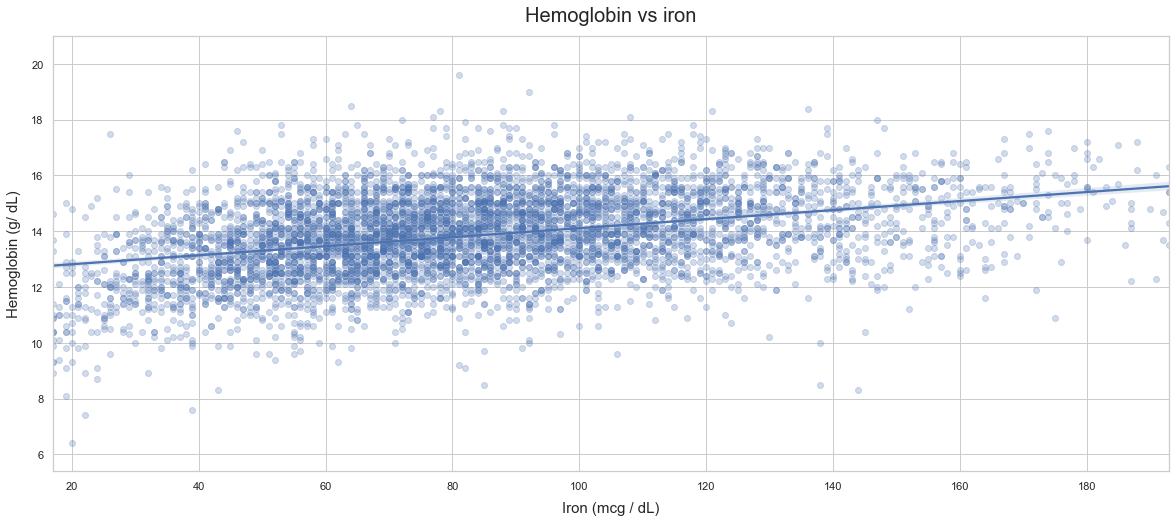

In [30]:
plt.figure(figsize=[20,8])
sb.set_theme(style=None)

sb.regplot(data=df, x='iron', y='hgb', scatter_kws={'alpha':.25}, truncate=False)

plt.title('Hemoglobin vs iron', fontsize=20, pad=15)
plt.xlabel('Iron (mcg / dL)', fontsize=15, labelpad=10)
plt.ylabel('Hemoglobin (g/ dL)', fontsize=15, labelpad=10);

plt.xlim(df.iron.quantile(.01), df.iron.quantile(.99));

### hct

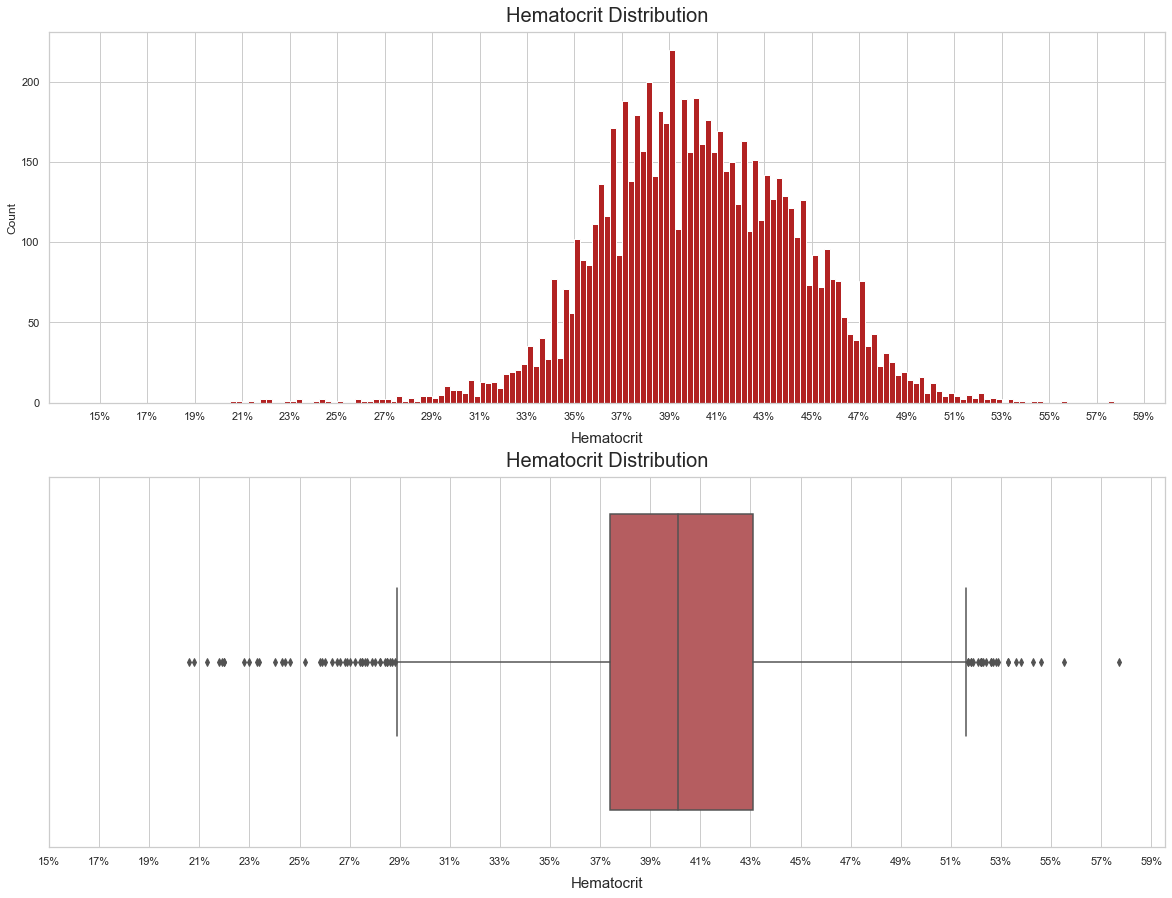

In [32]:
plt.figure(figsize=[20,15])
sb.set_theme(style='whitegrid')

plt.subplot(2,1,1)
bins = np.arange(15, df.hct.max()+.25, .25)
plt.hist(data=df, x='hct', bins= bins, color='firebrick')

ticks = np.arange(15, df.hct.max()+2, 2)
labels = ['{:.0f}%'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Hematocrit Distribution', pad=10, fontsize=20)
plt.xlabel('Hematocrit', labelpad=10, fontsize=15)
plt.ylabel('Count');


plt.subplot(2,1,2)
sb.boxplot(data=df, x='hct', color='r')

ticks = np.arange(15, df.hct.max()+2, 2)
labels = ['{:.0f}%'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Hematocrit Distribution', pad=10, fontsize=20)
plt.xlabel('Hematocrit', labelpad=10, fontsize=15)
plt.ylabel('');

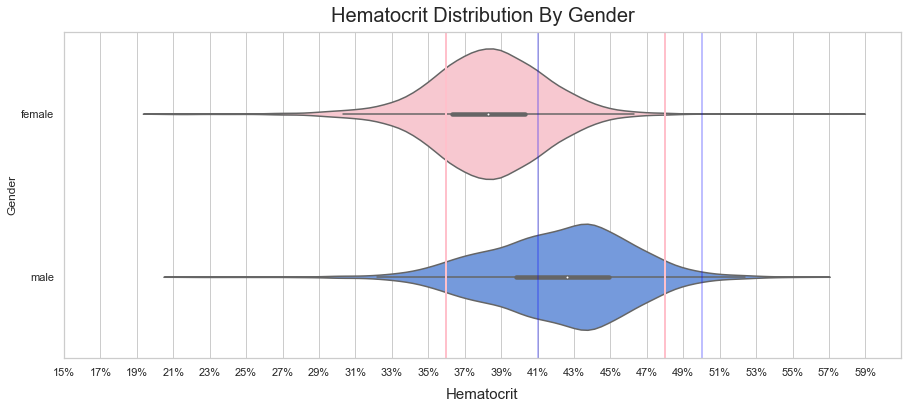

In [33]:
plt.figure(figsize=[15,6])
sb.set_theme(style='whitegrid')

sb.violinplot(data=df, x='hct', y='gender', order=['female', 'male'], orient='horizontal', palette=['pink', 'cornflowerblue']);

plt.axvline(x=36, linestyle='-', linewidth=2, color='pink', alpha=1)
plt.axvline(x=48, linestyle='-', linewidth=2, color='pink', alpha=1)
plt.axvline(x=41, linestyle='-', linewidth=2, color='blue', alpha=.25)
plt.axvline(x=50, linestyle='-', linewidth=2, color='blue', alpha=.25)


ticks = np.arange(15, df.hct.max()+2, 2)
labels = ['{:.0f}%'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Hematocrit Distribution By Gender', pad=10, fontsize=20)
plt.xlabel('Hematocrit', labelpad=10, fontsize=15)
plt.ylabel('Gender');

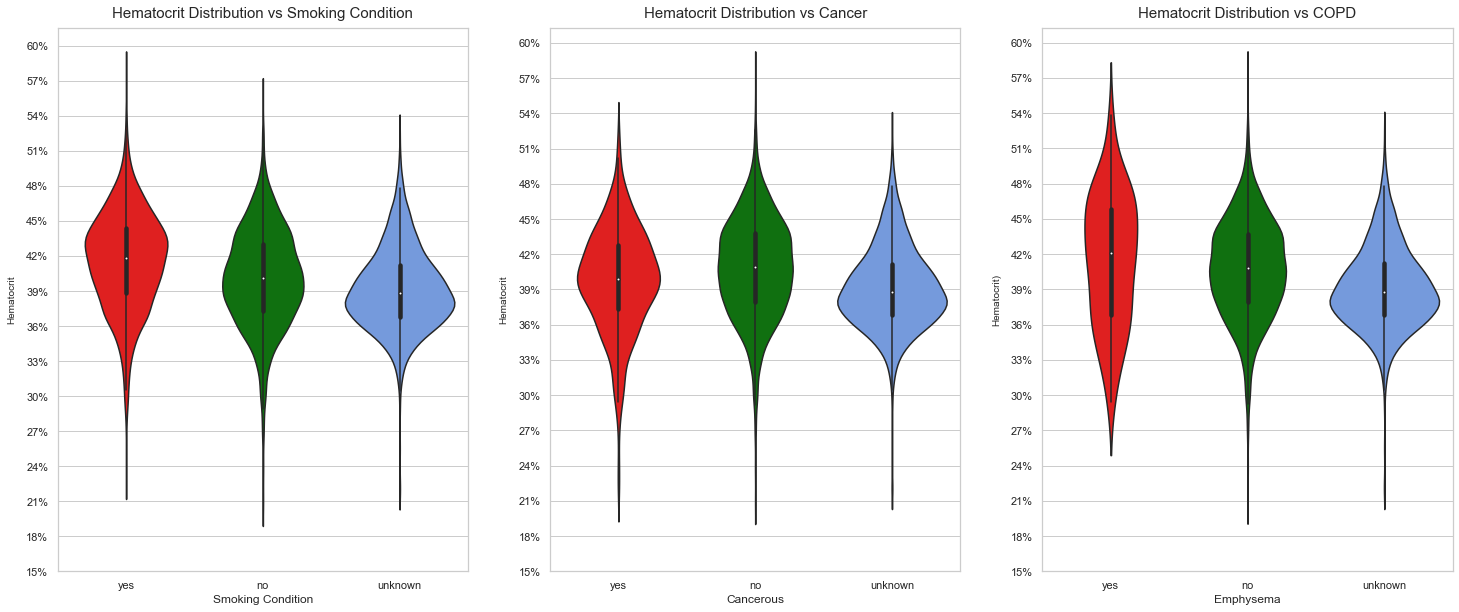

In [34]:
plt.figure(figsize=[25,10])
sb.set_theme(style='whitegrid')

plt.subplot(1,3,1)
sb.violinplot(data=df, y='hct', x='smoker', palette=['red', 'green', 'cornflowerblue']);

ticks = np.arange(15, df.hct.max()+3, 3)
labels = ['{:.0f}%'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.title('Hematocrit Distribution vs Smoking Condition', pad=10, fontsize=15)
plt.ylabel('Hematocrit', labelpad=10, fontsize=10)
plt.xlabel('Smoking Condition');

plt.subplot(1,3,2)
sb.violinplot(data=df, y='hct', x='cancer', palette=['red', 'green', 'cornflowerblue']);

ticks = np.arange(15, df.hct.max()+3, 3)
labels = ['{:.0f}%'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.title('Hematocrit Distribution vs Cancer', pad=10, fontsize=15)
plt.ylabel('Hematocrit', labelpad=10, fontsize=10)
plt.xlabel('Cancerous');

plt.subplot(1,3,3)
sb.violinplot(data=df, y='hct', x='copd', palette=['red', 'green', 'cornflowerblue']);

ticks = np.arange(15, df.hct.max()+3, 3)
labels = ['{:.0f}%'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.title('Hematocrit Distribution vs COPD', pad=10, fontsize=15)
plt.ylabel('Hematocrit)', labelpad=10, fontsize=10)
plt.xlabel('Emphysema');

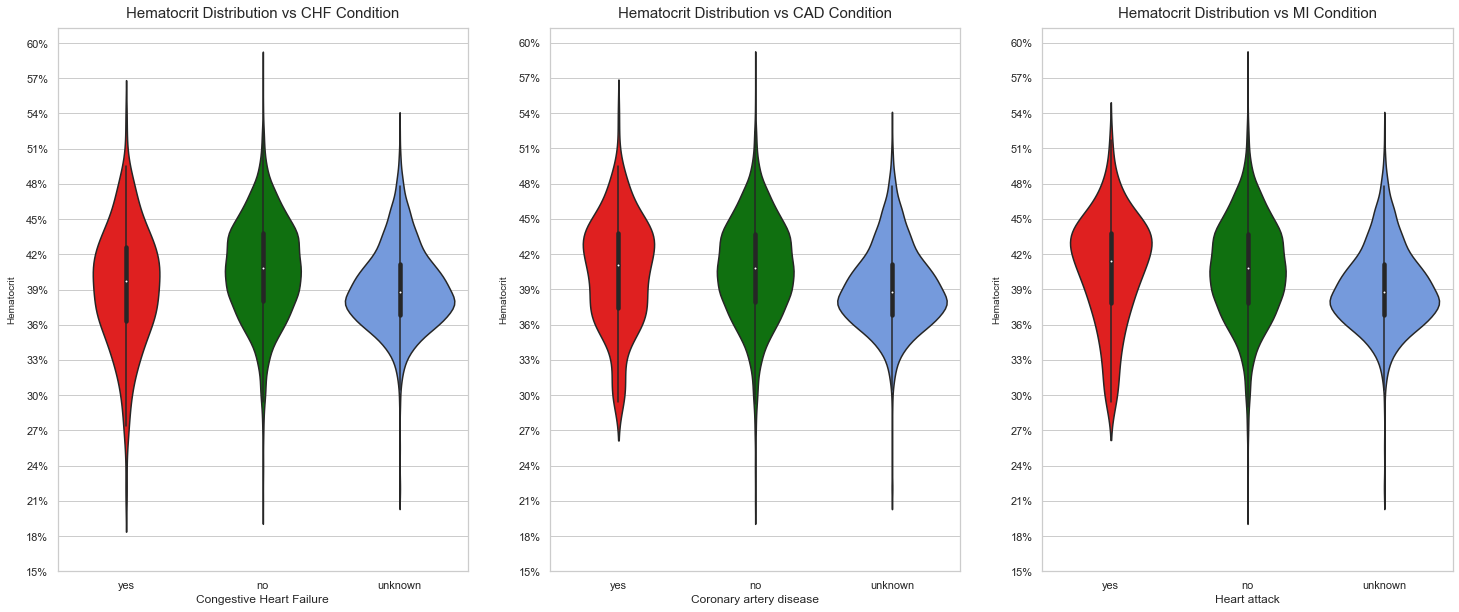

In [35]:
plt.figure(figsize=[25,10])
sb.set_theme(style='whitegrid')

plt.subplot(1,3,1)
sb.violinplot(data=df, y='hct', x='chf', palette=['red', 'green', 'cornflowerblue']);

ticks = np.arange(15, df.hct.max()+3, 3)
labels = ['{:.0f}%'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.title('Hematocrit Distribution vs CHF Condition', pad=10, fontsize=15)
plt.ylabel('Hematocrit', labelpad=10, fontsize=10)
plt.xlabel('Congestive Heart Failure');

plt.subplot(1,3,2)
sb.violinplot(data=df, y='hct', x='cad', palette=['red', 'green', 'cornflowerblue']);

ticks = np.arange(15, df.hct.max()+3, 3)
labels = ['{:.0f}%'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.title('Hematocrit Distribution vs CAD Condition', pad=10, fontsize=15)
plt.ylabel('Hematocrit', labelpad=10, fontsize=10)
plt.xlabel('Coronary artery disease');

plt.subplot(1,3,3)
sb.violinplot(data=df, y='hct', x='mi', palette=['red', 'green', 'cornflowerblue']);

ticks = np.arange(15, df.hct.max()+3, 3)
labels = ['{:.0f}%'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.title('Hematocrit Distribution vs MI Condition', pad=10, fontsize=15)
plt.ylabel('Hematocrit', labelpad=10, fontsize=10)
plt.xlabel('Heart attack');

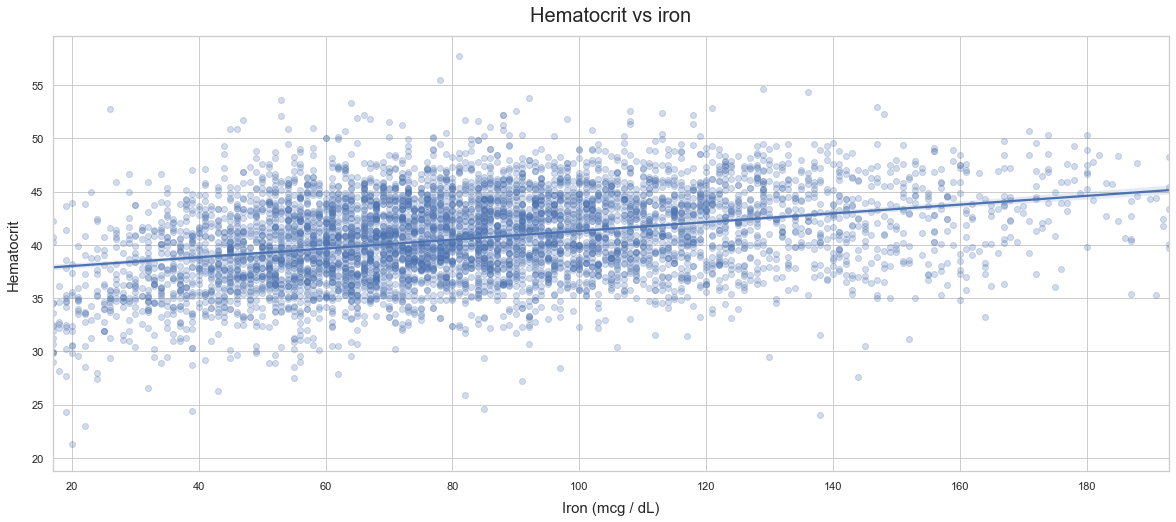

In [36]:
sb.set_theme(style='whitegrid')

plt.figure(figsize=[20,8])
sb.regplot(data=df, x='iron', y='hct', scatter_kws={'alpha':.25}, truncate=False)

plt.title('Hematocrit vs iron', fontsize=20, pad=15)
plt.xlabel('Iron (mcg / dL)', fontsize=15, labelpad=10)
plt.ylabel('Hematocrit', fontsize=15, labelpad=10);

plt.xlim(df.iron.quantile(.01), df.iron.quantile(.99));

### platelets

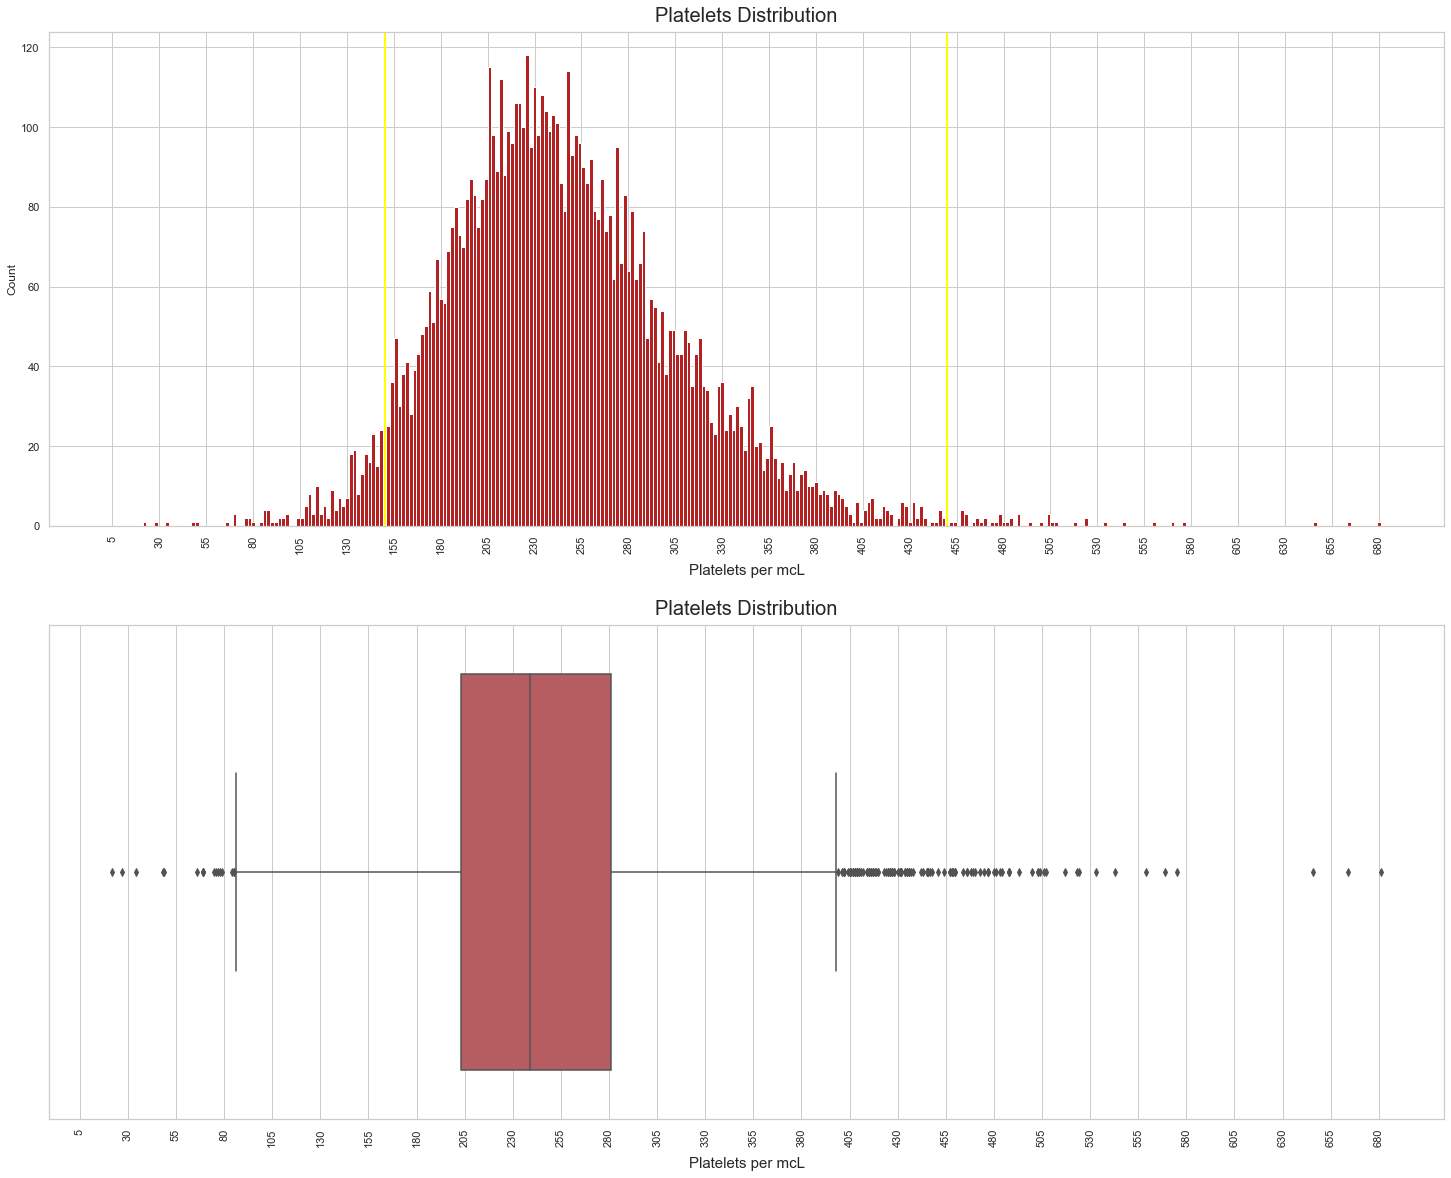

In [37]:
plt.figure(figsize=[25,20])
sb.set_theme(style='whitegrid')

plt.subplot(2,1,1)
bins = np.arange(5, df.platelets.max()+2, 2)
plt.hist(data=df, x='platelets', bins= bins, color='firebrick')

plt.axvline(x=150, linestyle='-', linewidth=2, color='yellow', alpha=1)
plt.axvline(x=450, linestyle='-', linewidth=2, color='yellow', alpha=1)

ticks = np.arange(5, df.platelets.max()+5, 25)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Platelets Distribution', pad=10, fontsize=20)
plt.xlabel('Platelets per mcL', labelpad=10, fontsize=15)
plt.ylabel('Count');
#plt.xlim(df.platelets.quantile(.01), df.platelets.quantile(.99))

plt.subplot(2,1,2)
sb.boxplot(data=df, x='platelets', color='r')

ticks = np.arange(5, df.platelets.max()+5, 25)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Platelets Distribution', pad=10, fontsize=20)
plt.xlabel('Platelets per mcL', labelpad=10, fontsize=15)
plt.ylabel('');

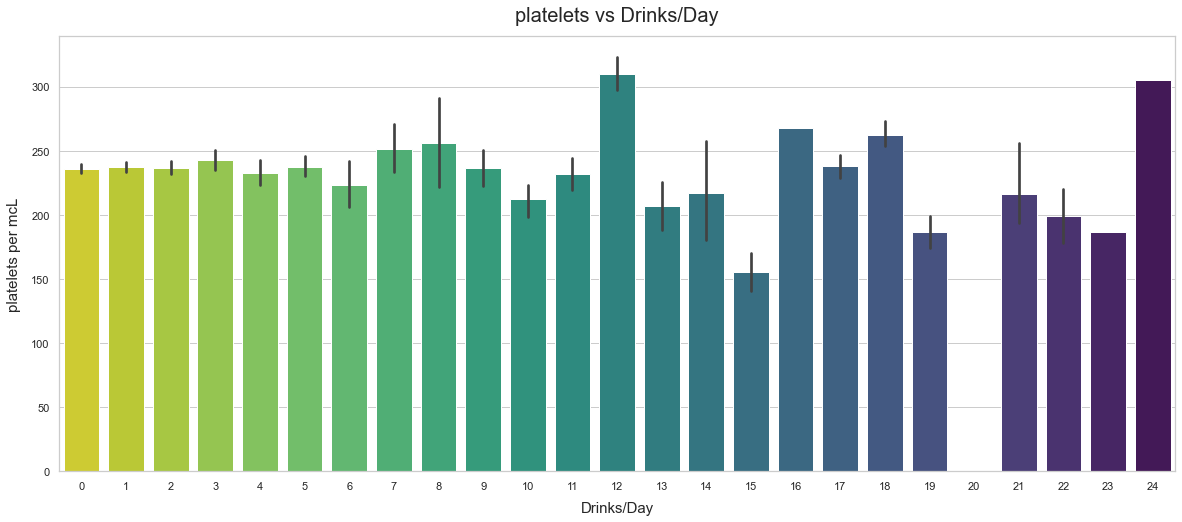

In [38]:
plt.figure(figsize=[20,8])
sb.set_theme(style='whitegrid')

p = sb.barplot(data=df, x='drinks_day', y='platelets', palette='viridis_r');

ticks = p.get_xticks()
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('platelets vs Drinks/Day', fontsize=20, pad=15)
plt.xlabel('Drinks/Day', fontsize=15, labelpad=10)
plt.ylabel('platelets per mcL', fontsize=15, labelpad=10);

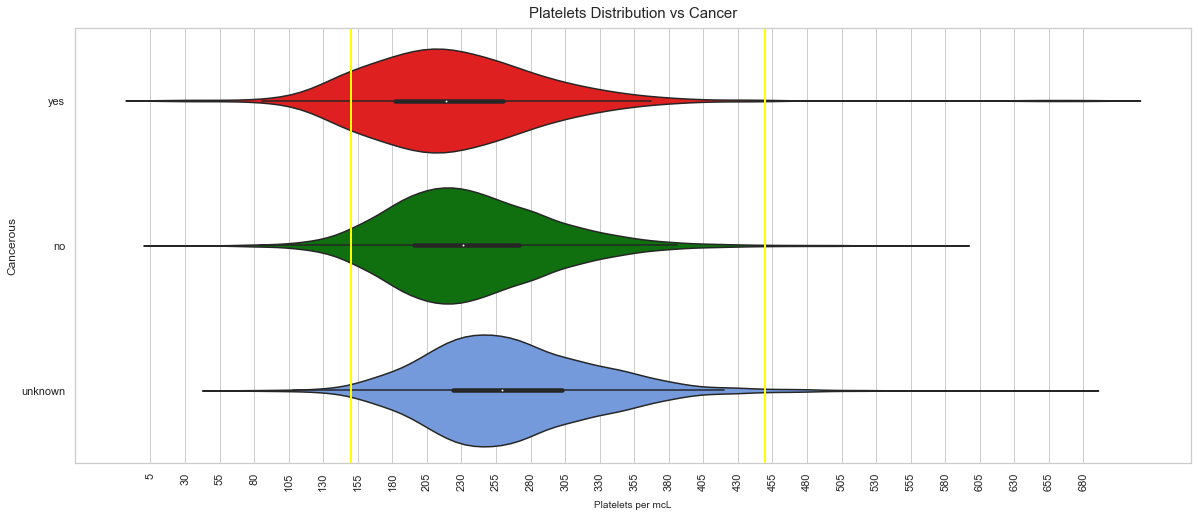

In [39]:
plt.figure(figsize=[20,8])
sb.set_theme(style='whitegrid')

sb.violinplot(data=df, x='platelets', y='cancer', orient='horizontal', palette=['red', 'green', 'cornflowerblue']);

plt.axvline(x=150, linestyle='-', linewidth=2, color='yellow', alpha=1)
plt.axvline(x=450, linestyle='-', linewidth=2, color='yellow', alpha=1)

ticks = np.arange(5, df.platelets.max()+5, 25)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=90)
plt.title('Platelets Distribution vs Cancer', pad=10, fontsize=15)
plt.xlabel('Platelets per mcL', labelpad=10, fontsize=10)
plt.ylabel('Cancerous');

### wbc, hgb, hct, and plateletes relations

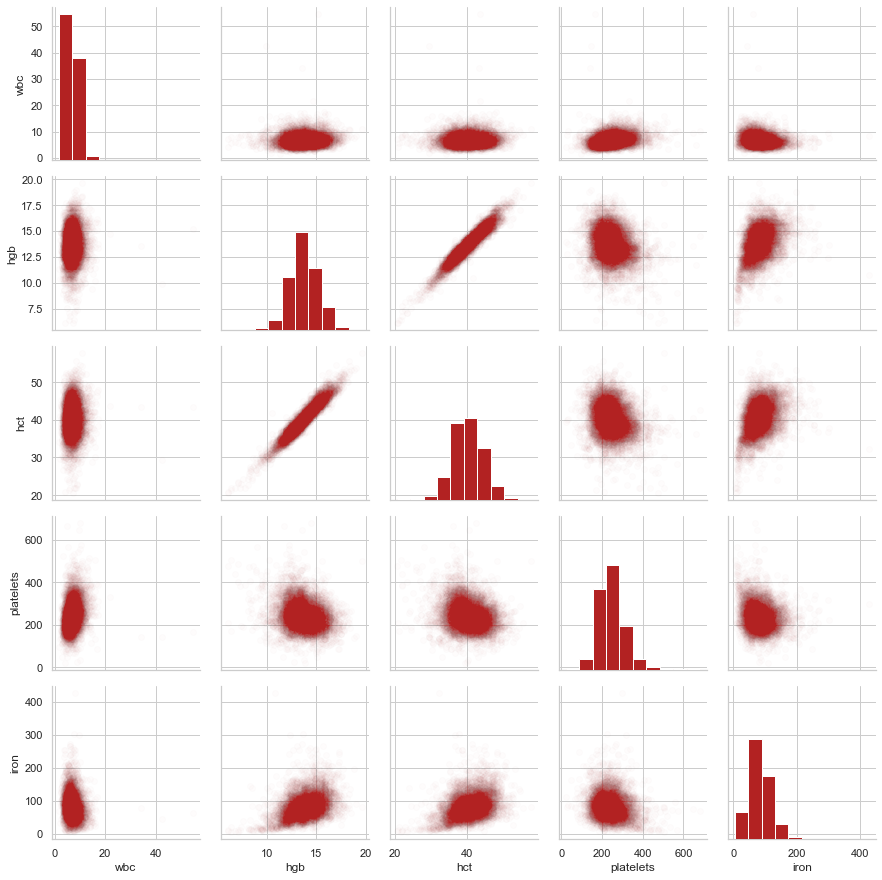

In [40]:
CBC_features = ['wbc', 'hgb', 'hct', 'platelets', 'iron']
g = sb.PairGrid(data=df, vars=CBC_features)
g.map_offdiag(plt.scatter, alpha=.01, color='firebrick')
g.map_diag(plt.hist, color='firebrick');

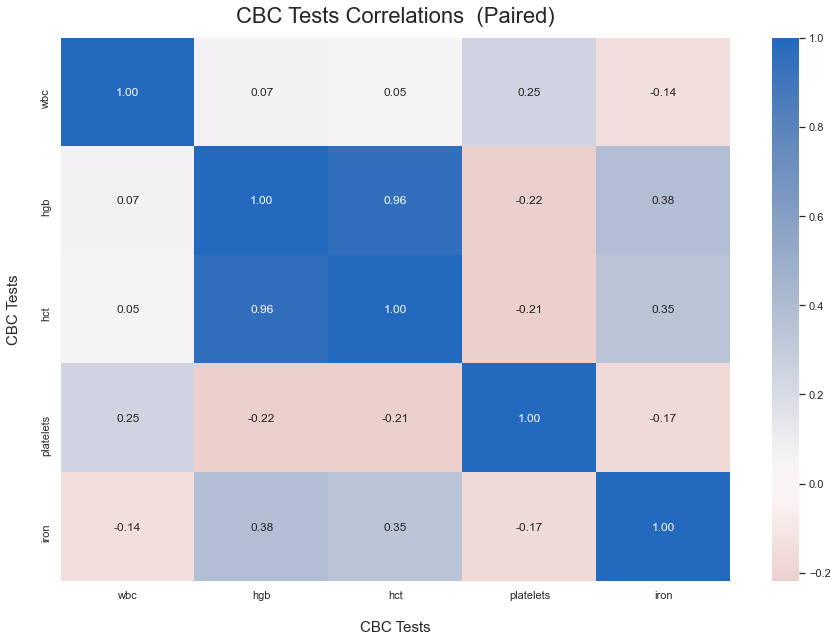

In [41]:
CBC_features = ['wbc', 'hgb', 'hct', 'platelets', 'iron']

plt.figure(figsize= [15,10])

correlations = df[CBC_features].corr()

sb.heatmap(correlations, cmap='vlag_r', annot=True, fmt='.2f', center = 0)

plt.title('CBC Tests Correlations  (Paired)', fontsize= 22, pad=15)
plt.xlabel('CBC Tests', fontsize= 15, labelpad=20)
plt.ylabel('CBC Tests', fontsize= 15, labelpad=20);

## 2- Liver Function Test (LFT)
> alt (Alanine aminotransferase)

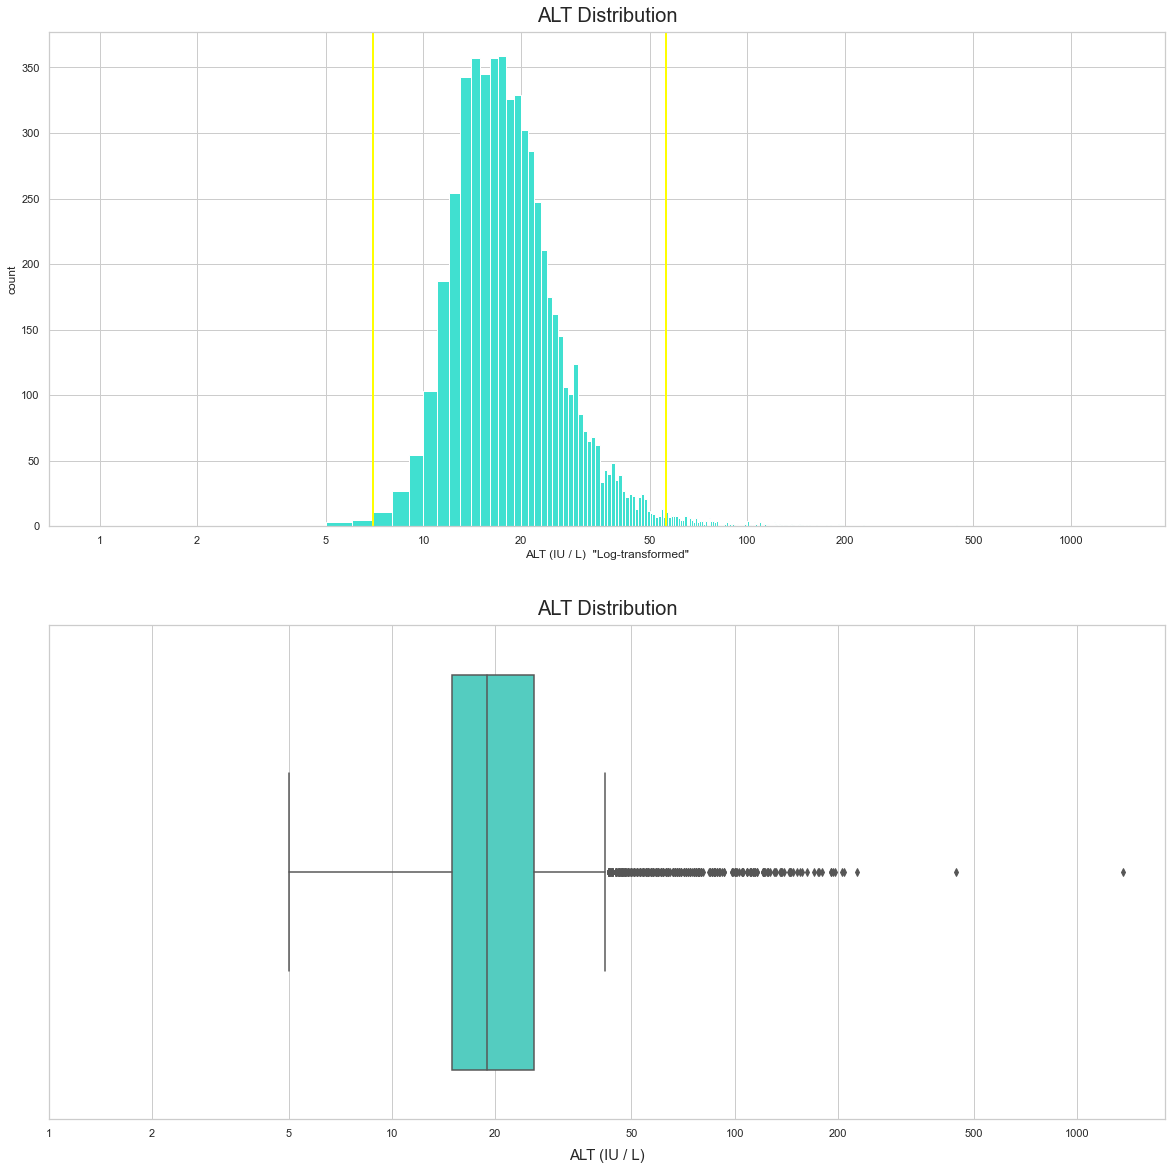

In [43]:
plt.figure(figsize=[20,20])

plt.subplot(2,1,1)
bins = np.arange(0, df.alt.max()+1, 1)

plt.hist(data=df, x='alt', bins=bins, color='turquoise')
plt.xscale('log')

plt.axvline(x=7, linestyle='-', linewidth=2, color='yellow', alpha=1)
plt.axvline(x=56, linestyle='-', linewidth=2, color='yellow', alpha=1)

ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('ALT Distribution', pad=10, fontsize=20)
plt.xlabel('ALT (IU / L)  "Log-transformed"', fontsize=12)
plt.ylabel('count');


plt.subplot(2,1,2)
sb.boxplot(data=df, x='alt', color='turquoise')
plt.xscale('log')

plt.xticks(ticks, labels, rotation=0)
plt.title('ALT Distribution', pad=10, fontsize=20)
plt.xlabel('ALT (IU / L)', labelpad=10, fontsize=15)
plt.ylabel('');

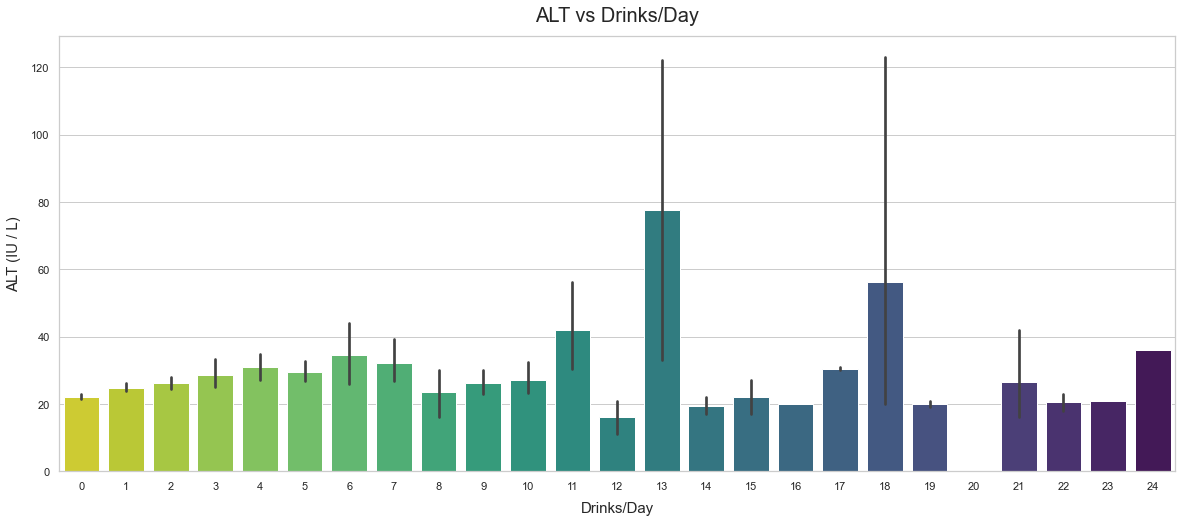

In [44]:
plt.figure(figsize=[20,8])
p = sb.barplot(data=df, x='drinks_day', y='alt', palette='viridis_r');

ticks = p.get_xticks()
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('ALT vs Drinks/Day', fontsize=20, pad=15)
plt.xlabel('Drinks/Day', fontsize=15, labelpad=10)
plt.ylabel('ALT (IU / L)', fontsize=15, labelpad=10);

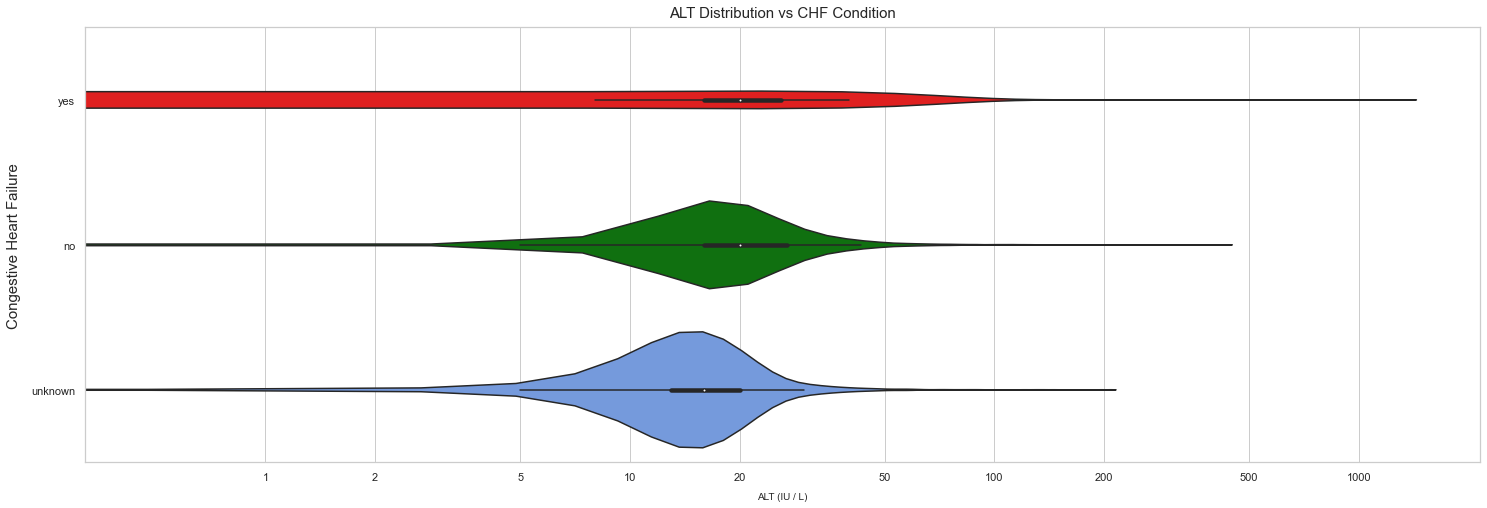

In [45]:
plt.figure(figsize=[25,8])

sb.violinplot(data=df, x='alt', y='chf', orient='horizontal', palette=['red', 'green', 'cornflowerblue']);
plt.xscale('log')

ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('ALT Distribution vs CHF Condition', pad=10, fontsize=15)
plt.xlabel('ALT (IU / L)', labelpad=10, fontsize=10)
plt.ylabel('Congestive Heart Failure', fontsize=15, labelpad=10);

### ast liver enzyme

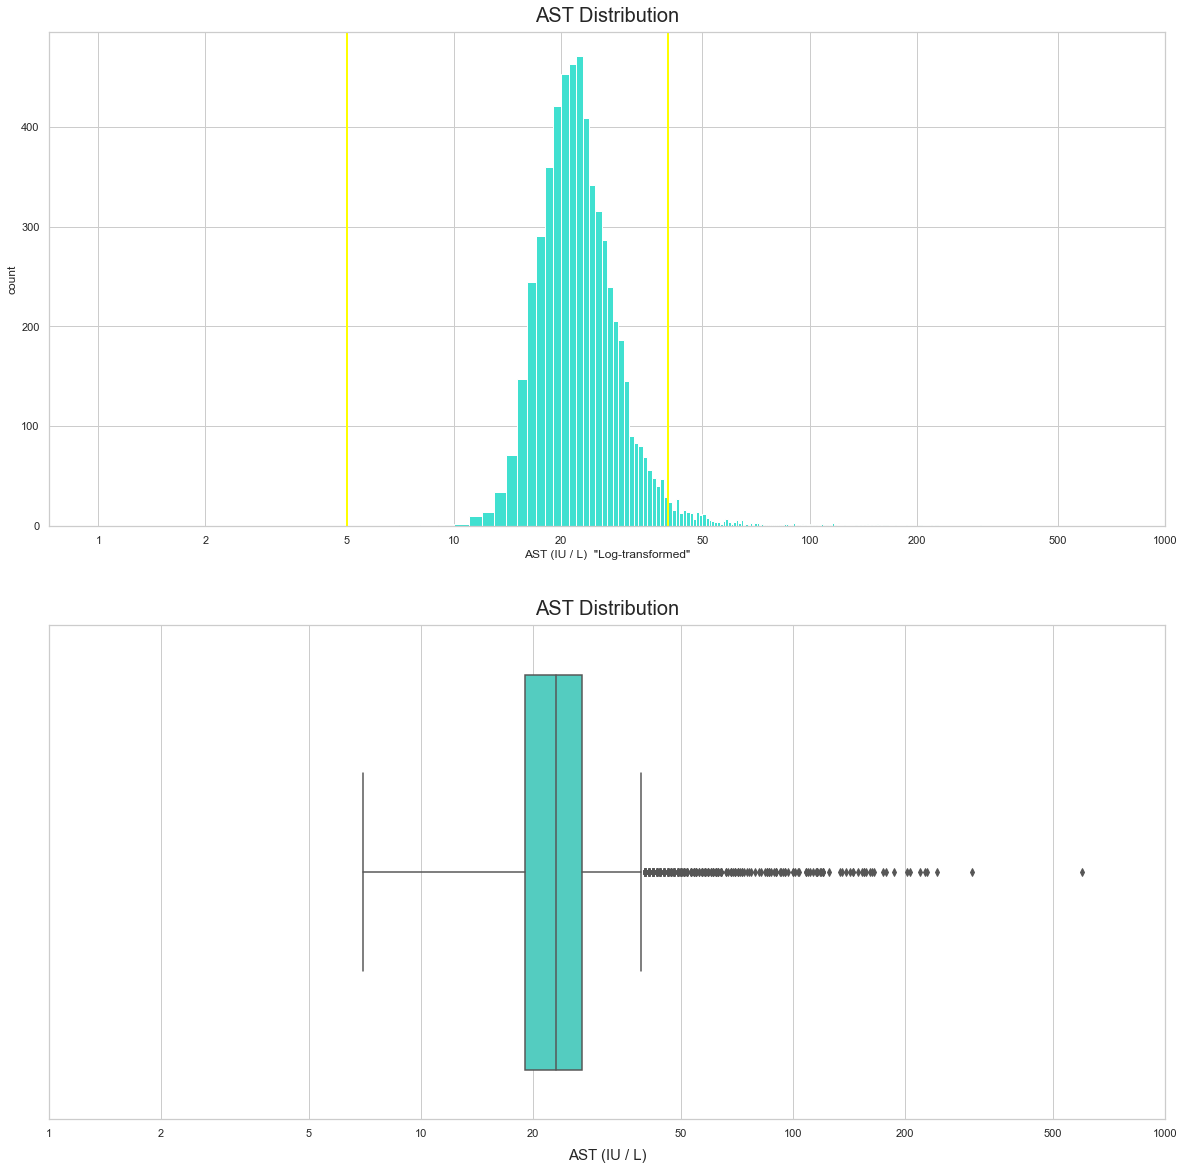

In [46]:
plt.figure(figsize=[20,20])

plt.subplot(2,1,1)
bins = np.arange(0, df.ast.max()+1, 1)

plt.hist(data=df, x='ast', bins=bins, color='turquoise')
plt.xscale('log')

plt.axvline(x=5, linestyle='-', linewidth=2, color='yellow', alpha=1)
plt.axvline(x=40, linestyle='-', linewidth=2, color='yellow', alpha=1)

ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('AST Distribution', pad=10, fontsize=20)
plt.xlabel('AST (IU / L)  "Log-transformed"', fontsize=12)
plt.ylabel('count');


plt.subplot(2,1,2)
sb.boxplot(data=df, x='ast', color='turquoise')
plt.xscale('log')

plt.xticks(ticks, labels, rotation=0)
plt.title('AST Distribution', pad=10, fontsize=20)
plt.xlabel('AST (IU / L)', labelpad=10, fontsize=15)
plt.ylabel('');

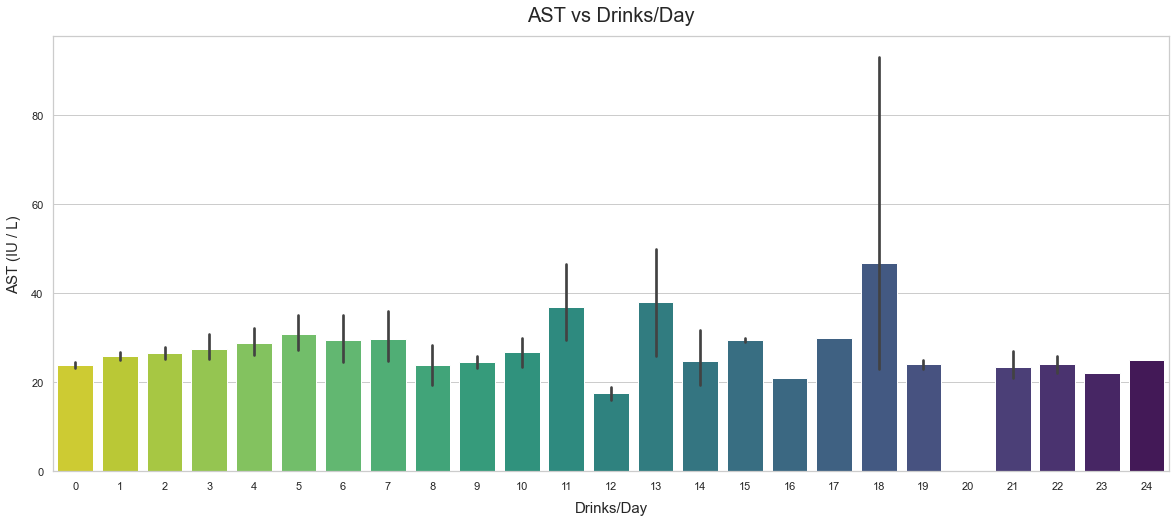

In [47]:
plt.figure(figsize=[20,8])
p = sb.barplot(data=df, x='drinks_day', y='ast', palette='viridis_r');

ticks = p.get_xticks()
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('AST vs Drinks/Day', fontsize=20, pad=15)
plt.xlabel('Drinks/Day', fontsize=15, labelpad=10)
plt.ylabel('AST (IU / L)', fontsize=15, labelpad=10);

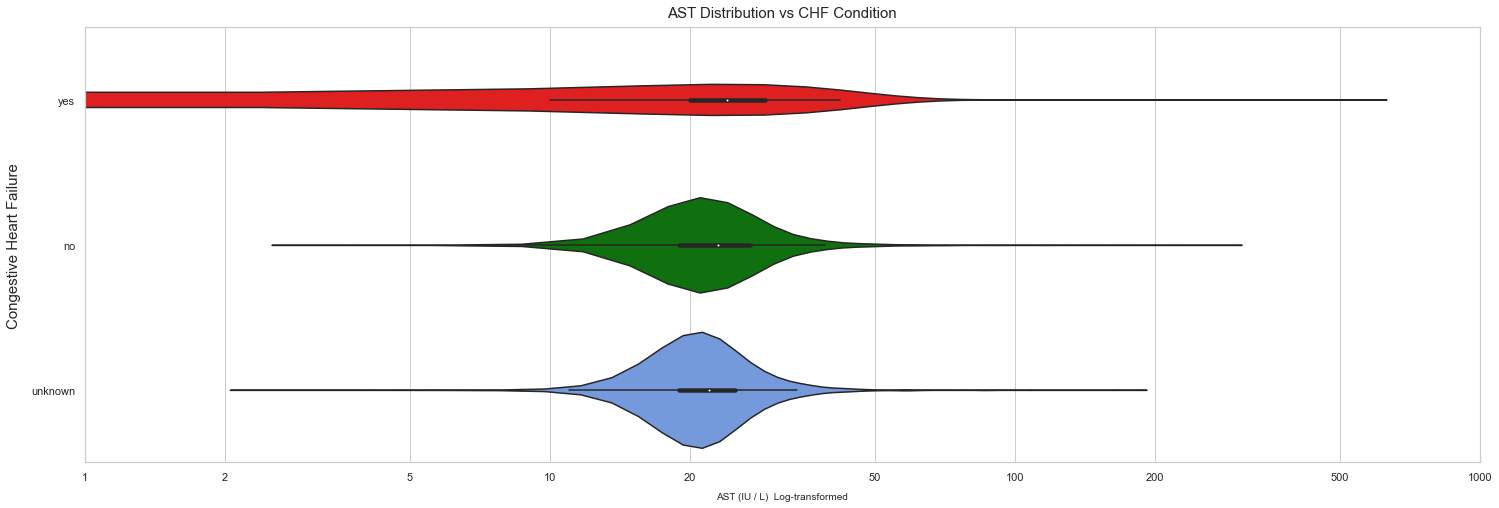

In [48]:
plt.figure(figsize=[25,8])

sb.violinplot(data=df, x='ast', y='chf', orient='horizontal', palette=['red', 'green', 'cornflowerblue']);
plt.xscale('log')

ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('AST Distribution vs CHF Condition', pad=10, fontsize=15)
plt.xlabel('AST (IU / L)  Log-transformed', labelpad=10, fontsize=10)
plt.ylabel('Congestive Heart Failure', fontsize=15, labelpad=10);

### alk_phos (Alkaline phosphatase)

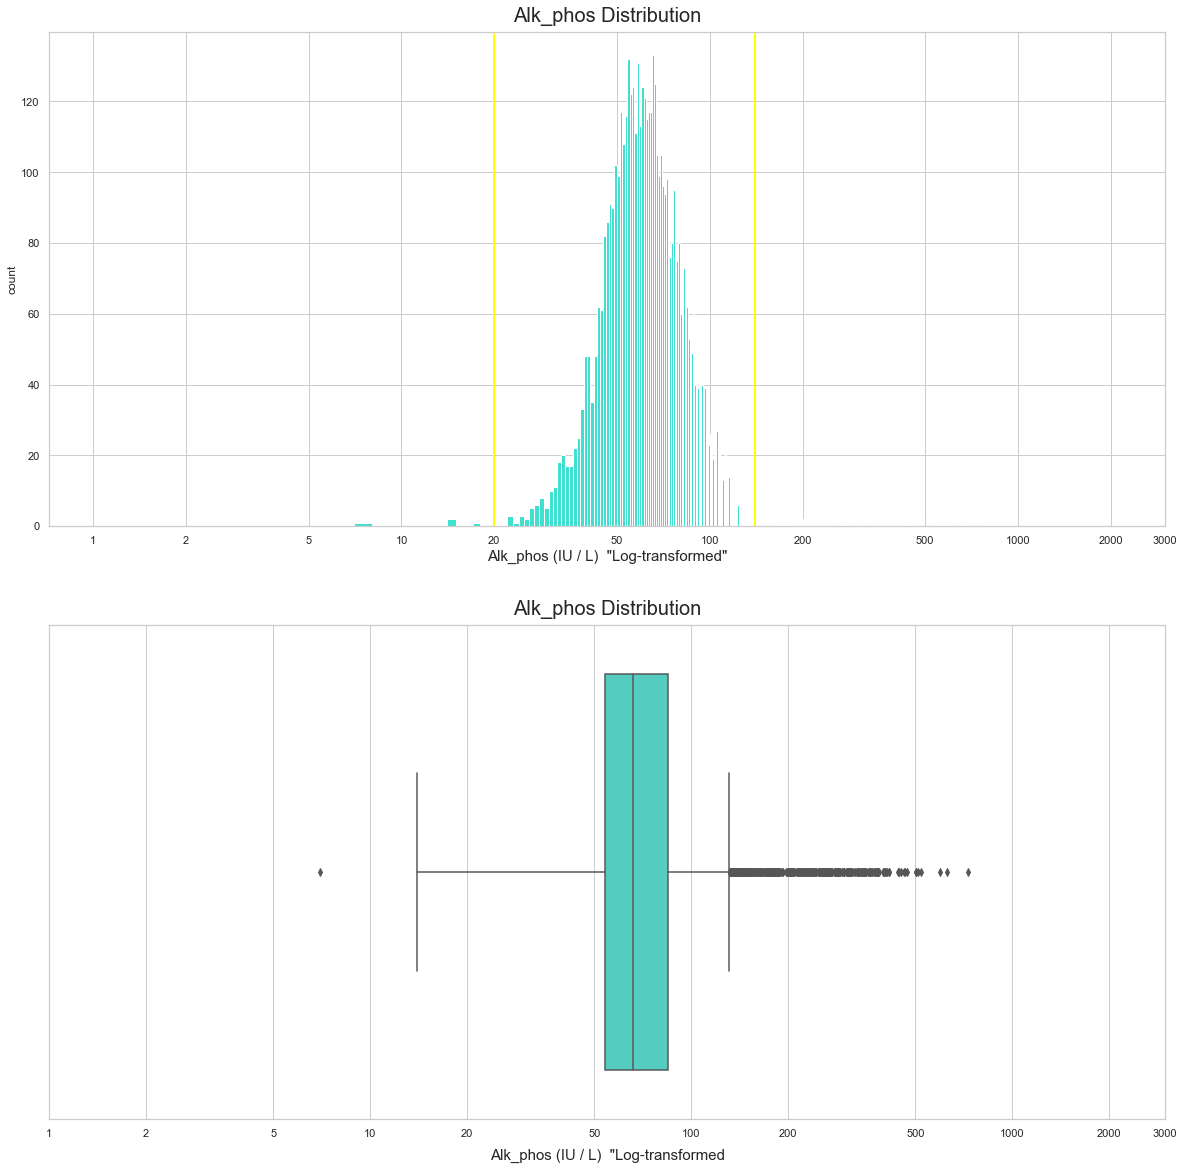

In [49]:
plt.figure(figsize=[20,20])

plt.subplot(2,1,1)
bins = np.arange(0, df.alk_phos.max()+1, 1)

plt.hist(data=df, x='alk_phos', bins=bins, color='turquoise')
plt.xscale('log')

plt.axvline(x=20, linestyle='-', linewidth=2, color='yellow', alpha=1)
plt.axvline(x=140, linestyle='-', linewidth=2, color='yellow', alpha=1)

ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 3000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Alk_phos Distribution', pad=10, fontsize=20)
plt.xlabel('Alk_phos (IU / L)  "Log-transformed"', fontsize=15)
plt.ylabel('count');


plt.subplot(2,1,2)
sb.boxplot(data=df, x='alk_phos', color='turquoise')
plt.xscale('log')

plt.xticks(ticks, labels, rotation=0)
plt.title('Alk_phos Distribution', pad=10, fontsize=20)
plt.xlabel('Alk_phos (IU / L)  "Log-transformed', labelpad=10, fontsize=15)
plt.ylabel('');

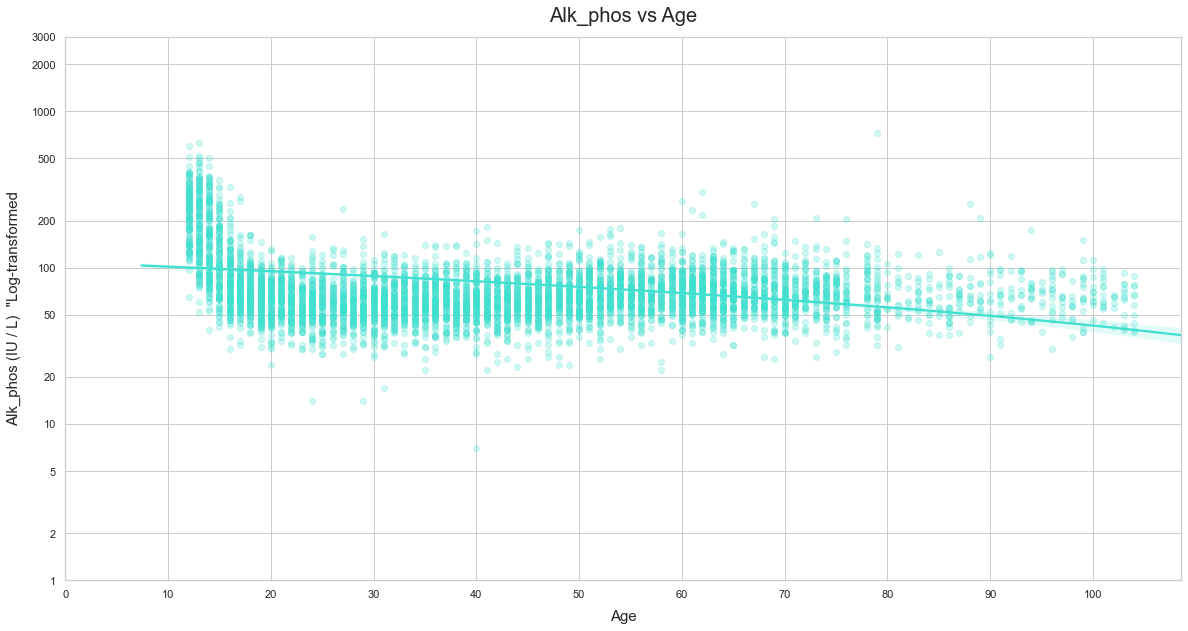

In [50]:
plt.figure(figsize=[20,10])
sb.regplot(data=df, x='age', y='alk_phos', color='turquoise', scatter_kws={'alpha':.25}, truncate=False)
plt.yscale('log')

ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 3000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels)

ticks = np.arange(0, 110, 10)
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Alk_phos vs Age', fontsize=20, pad=15)
plt.xlabel('Age', fontsize=15, labelpad=10)
plt.ylabel('Alk_phos (IU / L)  "Log-transformed', fontsize=15, labelpad=10);

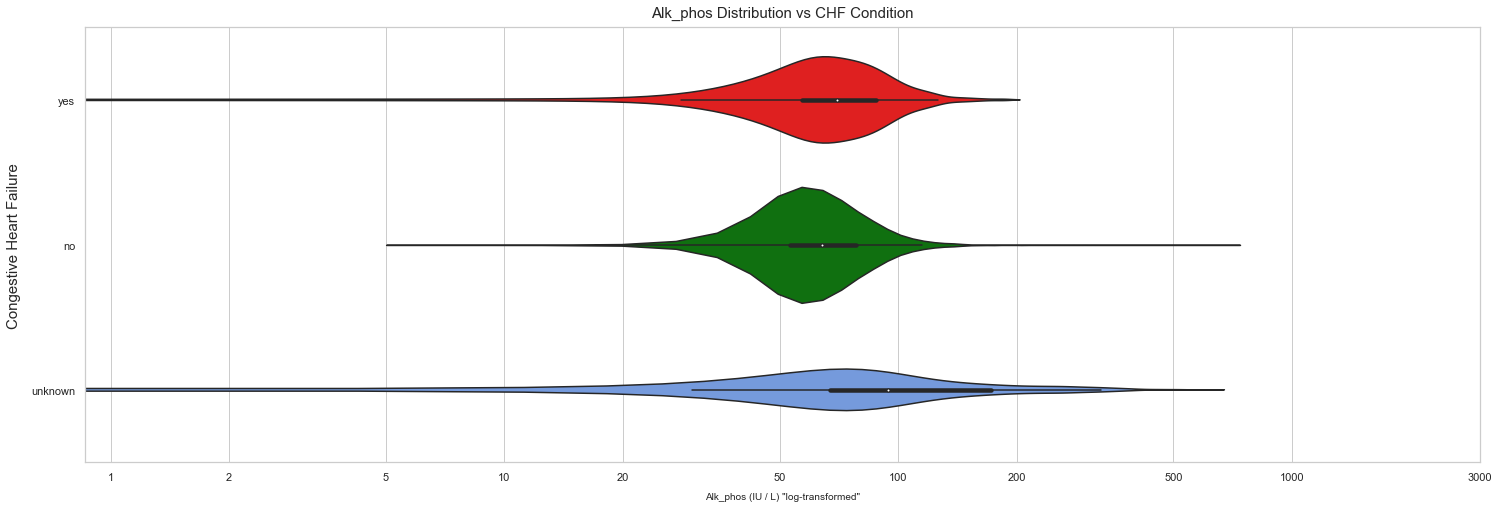

In [51]:
plt.figure(figsize=[25,8])

sb.violinplot(data=df, x='alk_phos', y='chf', orient='horizontal', palette=['red', 'green', 'cornflowerblue']);
plt.xscale('log')

ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 3000]
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Alk_phos Distribution vs CHF Condition', pad=10, fontsize=15)
plt.xlabel('Alk_phos (IU / L) "log-transformed"', labelpad=10, fontsize=10)
plt.ylabel('Congestive Heart Failure', fontsize=15, labelpad=10);

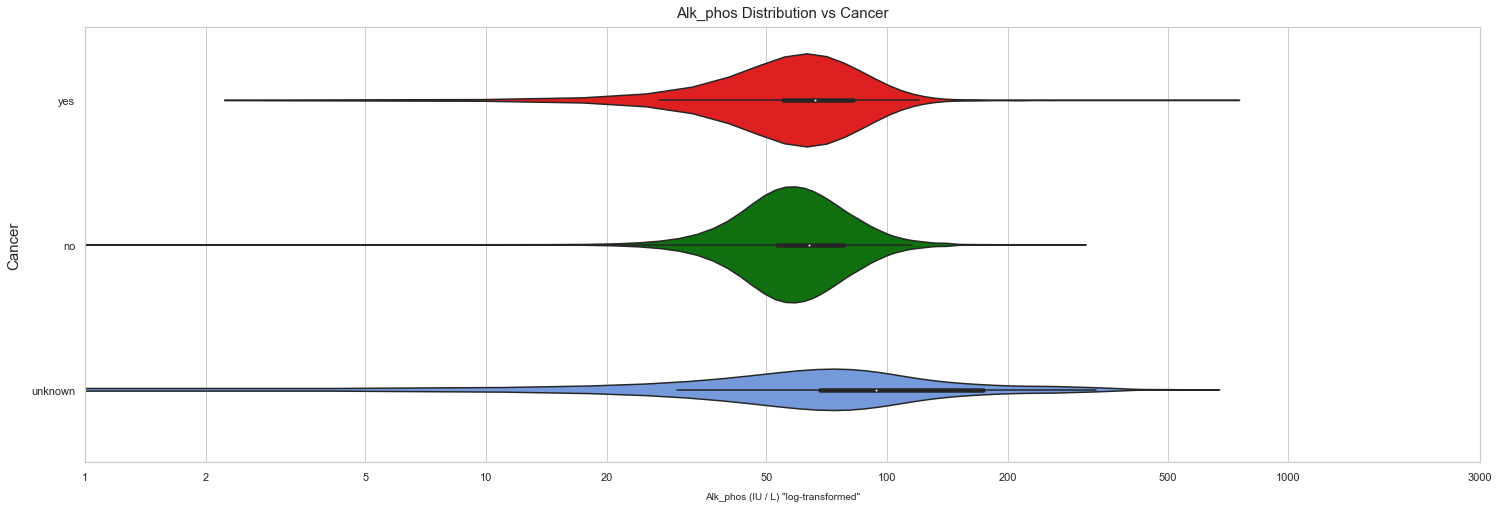

In [52]:
plt.figure(figsize=[25,8])

sb.violinplot(data=df, x='alk_phos', y='cancer', orient='horizontal', palette=['red', 'green', 'cornflowerblue']);
plt.xscale('log')

ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 3000]
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Alk_phos Distribution vs Cancer', pad=10, fontsize=15)
plt.xlabel('Alk_phos (IU / L) "log-transformed"', labelpad=10, fontsize=10)
plt.ylabel('Cancer', fontsize=15, labelpad=10);

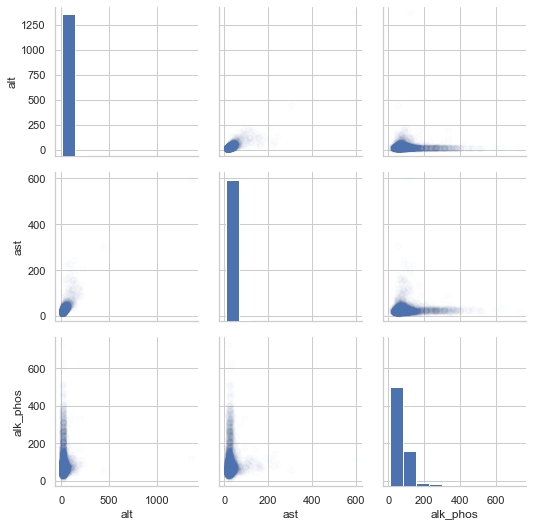

In [53]:
LFT_features = ['alt', 'ast', 'alk_phos']
g = sb.PairGrid(data=df, vars=LFT_features)
g.map_offdiag(plt.scatter, alpha=.01)
g.map_diag(plt.hist);

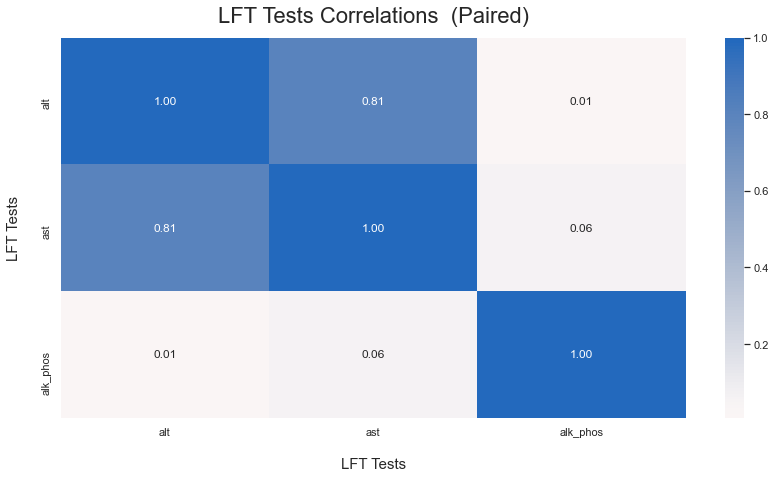

In [54]:
LFT_features = ['alt', 'ast', 'alk_phos']

plt.figure(figsize= [14,7])

correlations = df[LFT_features].corr()

sb.heatmap(correlations, cmap='vlag_r', annot=True, fmt='.2f', center = 0)

plt.title('LFT Tests Correlations  (Paired)', fontsize= 22, pad=15)
plt.xlabel('LFT Tests', fontsize= 15, labelpad=20)
plt.ylabel('LFT Tests', fontsize= 15, labelpad=20);

## 3- Kidney Function Test (KFT)
> BUN, cr

### bun Blood urea Nitrogen (BUN)

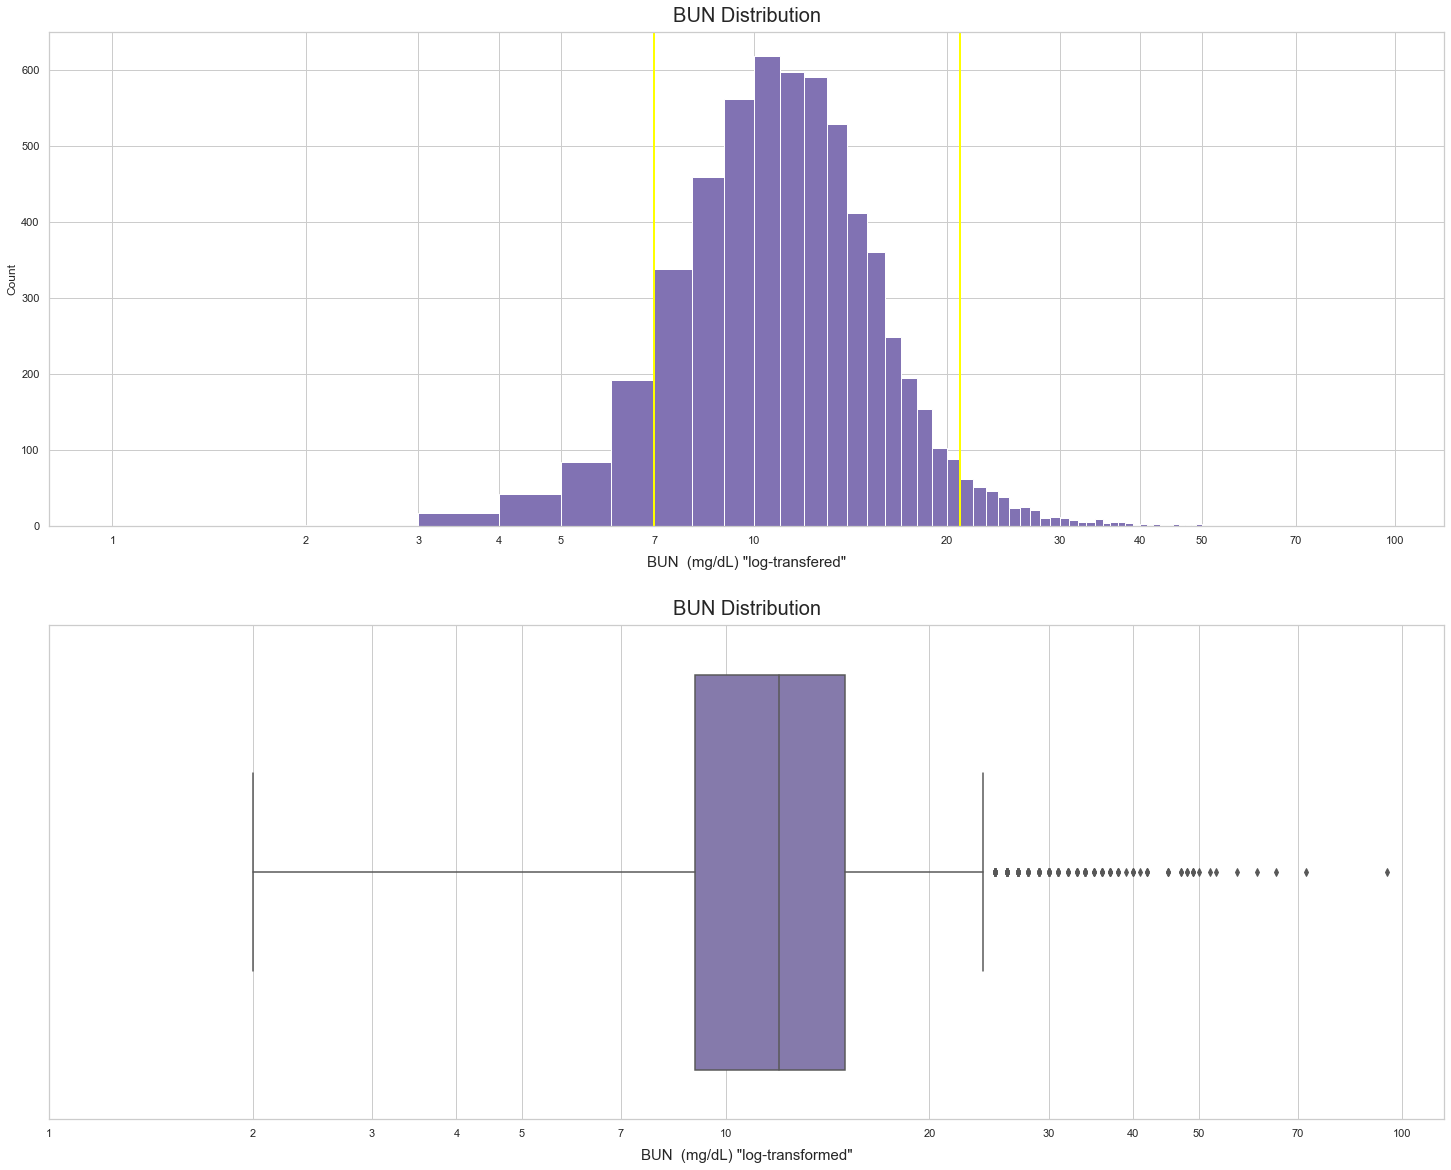

In [55]:
plt.figure(figsize=[25,20])

plt.subplot(2,1,1)
bins = np.arange(1, df.bun.max()+1, 1)
plt.hist(data=df, x='bun', bins= bins, color='m')
plt.xscale('log')

plt.axvline(x=7, linestyle='-', linewidth=2, color='yellow', alpha=1)
plt.axvline(x=21, linestyle='-', linewidth=2, color='yellow', alpha=1)

ticks = [1,2, 3, 4, 5, 7, 10, 20, 30, 40, 50, 70,100]
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation=0)

plt.title('BUN Distribution', pad=10, fontsize=20)
plt.xlabel('BUN  (mg/dL) "log-transfered"', labelpad=10, fontsize=15)
plt.ylabel('Count');


plt.subplot(2,1,2)
sb.boxplot(data=df, x='bun', color='m')
plt.xscale('log')

plt.xticks(ticks, labels, rotation=0)
plt.title('BUN Distribution', pad=10, fontsize=20)
plt.xlabel('BUN  (mg/dL) "log-transformed"', labelpad=10, fontsize=15)
plt.ylabel('');

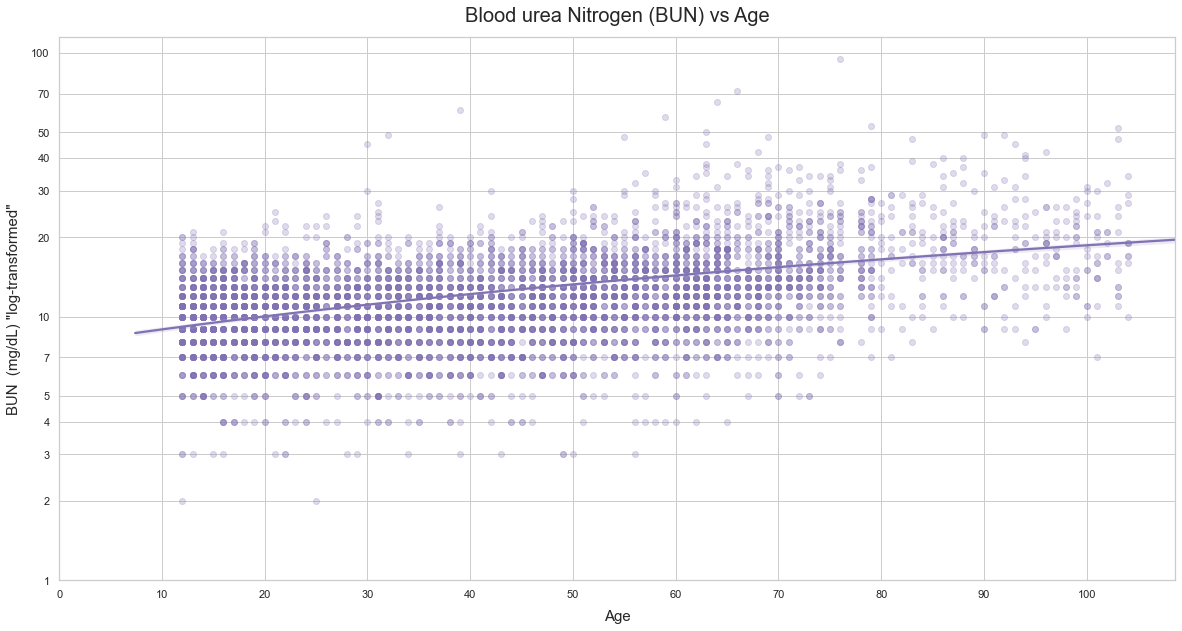

In [56]:
plt.figure(figsize=[20,10])
sb.regplot(data=df, x='age', y='bun', color='m', scatter_kws={'alpha':.25}, truncate=False)
plt.yscale('log')

ticks = [1,2, 3, 4, 5, 7, 10, 20, 30, 40, 50, 70,100]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels)

ticks = np.arange(0, 110, 10)
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Blood urea Nitrogen (BUN) vs Age', fontsize=20, pad=15)
plt.xlabel('Age', fontsize=15, labelpad=10)
plt.ylabel('BUN  (mg/dL) "log-transformed"', fontsize=15, labelpad=10);

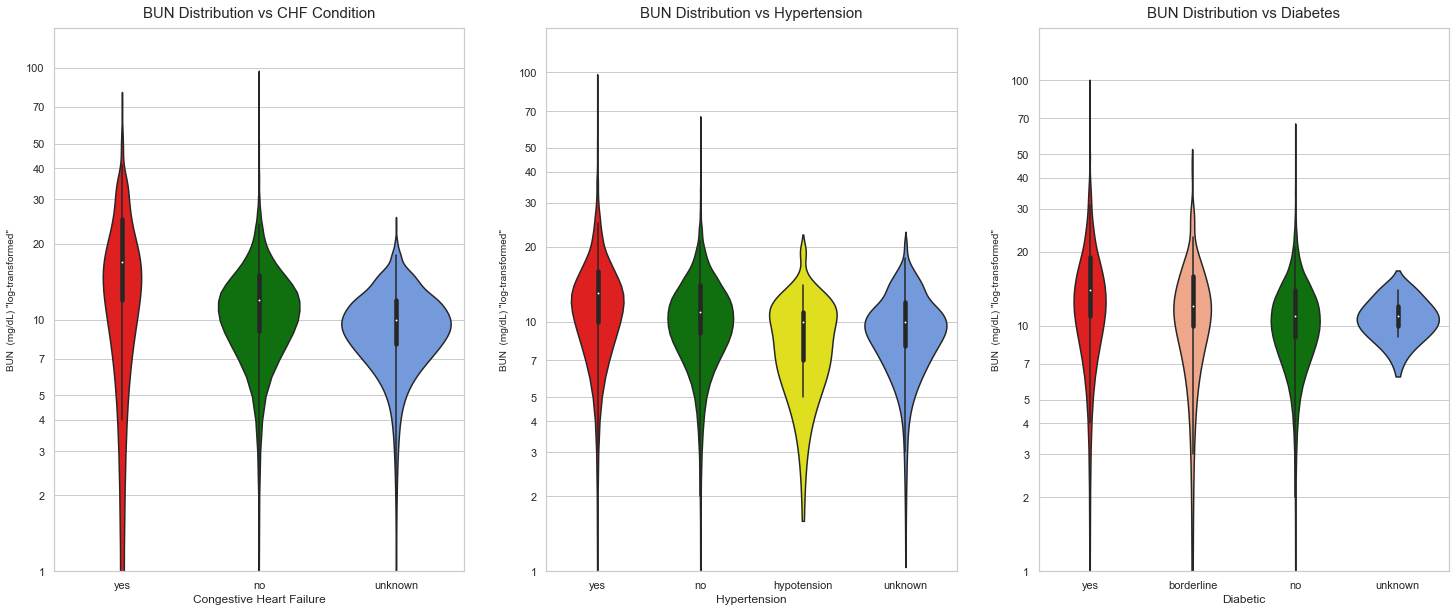

In [57]:
plt.figure(figsize=[25,10])

plt.subplot(1,3,1)
sb.violinplot(data=df, y='bun', x='chf', palette=['red', 'green', 'cornflowerblue']);
plt.yscale('log')

ticks = [1,2, 3, 4, 5, 7, 10, 20, 30, 40, 50, 70,100]
labels = ['{:.0f}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.title('BUN Distribution vs CHF Condition', pad=10, fontsize=15)
plt.ylabel('BUN  (mg/dL) "log-transformed"', labelpad=10, fontsize=10)
plt.xlabel('Congestive Heart Failure');
plt.ylim(1)


plt.subplot(1,3,2)
sb.violinplot(data=df, y='bun', x='hypertension', palette=['red', 'green', 'yellow', 'cornflowerblue']);
plt.yscale('log')

plt.yticks(ticks, labels)
plt.title('BUN Distribution vs Hypertension', pad=10, fontsize=15)
plt.ylabel('BUN  (mg/dL) "log-transformed"', labelpad=10, fontsize=10)
plt.xlabel('Hypertension');
plt.ylim(1)


plt.subplot(1,3,3)
sb.violinplot(data=df, y='bun', x='diabetes', palette=['red', 'lightsalmon', 'green', 'cornflowerblue']);
plt.yscale('log')

plt.yticks(ticks, labels)
plt.title('BUN Distribution vs Diabetes', pad=10, fontsize=15)
plt.ylabel('BUN  (mg/dL) "log-transformed"', labelpad=10, fontsize=10)
plt.xlabel('Diabetic')
plt.ylim(1);

### cr (Serum Creatinine test (Cr))

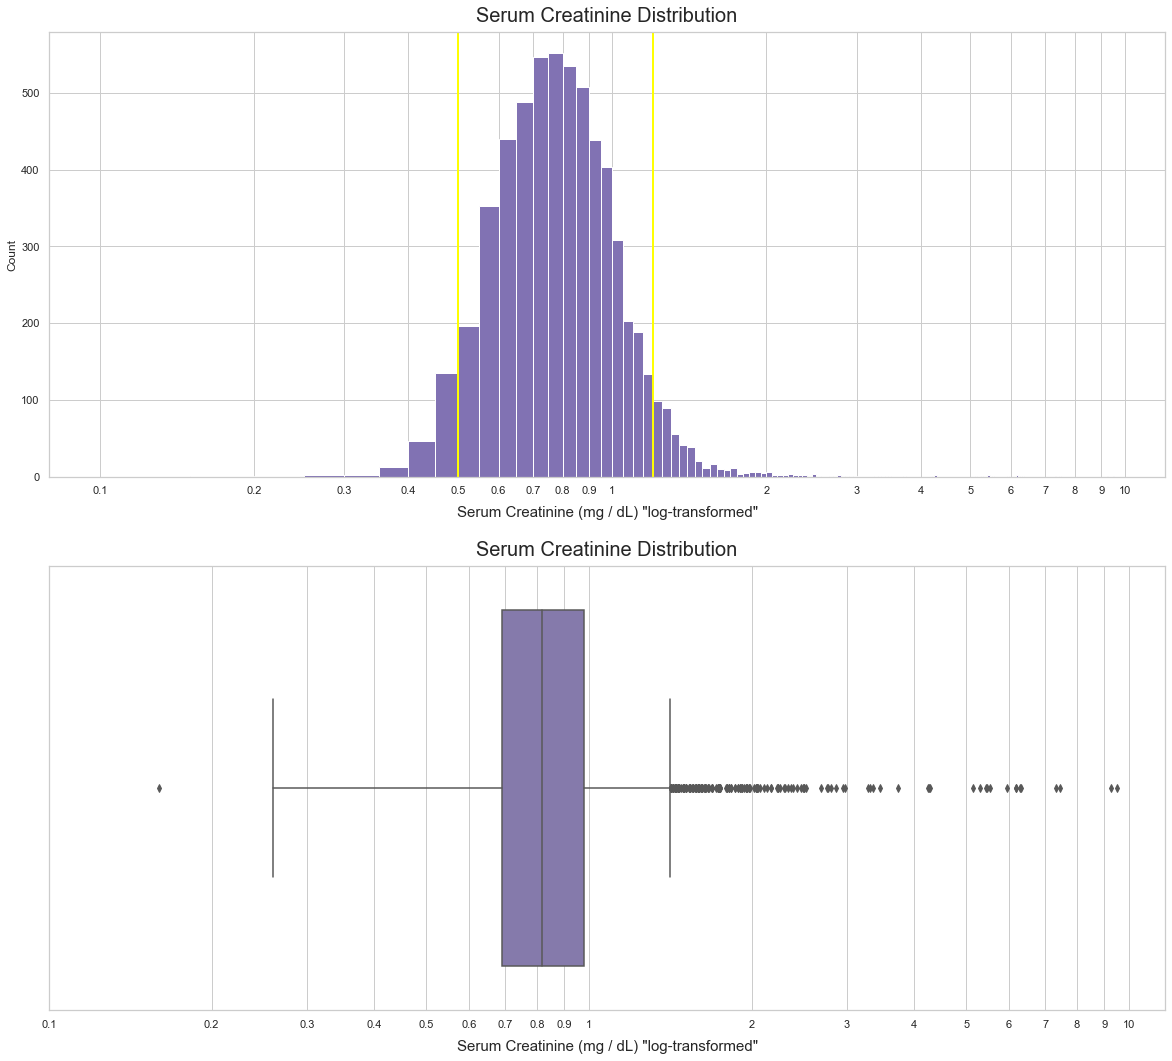

In [59]:
plt.figure(figsize=[20,18])
sb.set_theme(style='whitegrid')

plt.subplot(2,1,1)
bins = np.arange(.1, df.cr.max()+.05, .05)
plt.hist(data=df, x='cr', bins= bins, color='m')
plt.xscale('log')
plt.axvline(x= .5, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 1.2, linestyle='-', linewidth=2, color='yellow', alpha=.99)

ticks = [0.1, 0.2, 0.3, 0.4, .5, .6, .7, .8, .9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Serum Creatinine Distribution', pad=10, fontsize=20)
plt.xlabel('Serum Creatinine (mg / dL) "log-transformed"', labelpad=10, fontsize=15)
plt.ylabel('Count');


plt.subplot(2,1,2)

sb.boxplot(data=df, x='cr', color='m')
plt.xscale('log')

plt.xticks(ticks, labels)
plt.title('Serum Creatinine Distribution', pad=10, fontsize=20)
plt.xlabel('Serum Creatinine (mg / dL) "log-transformed"', labelpad=10, fontsize=15)
plt.ylabel('');

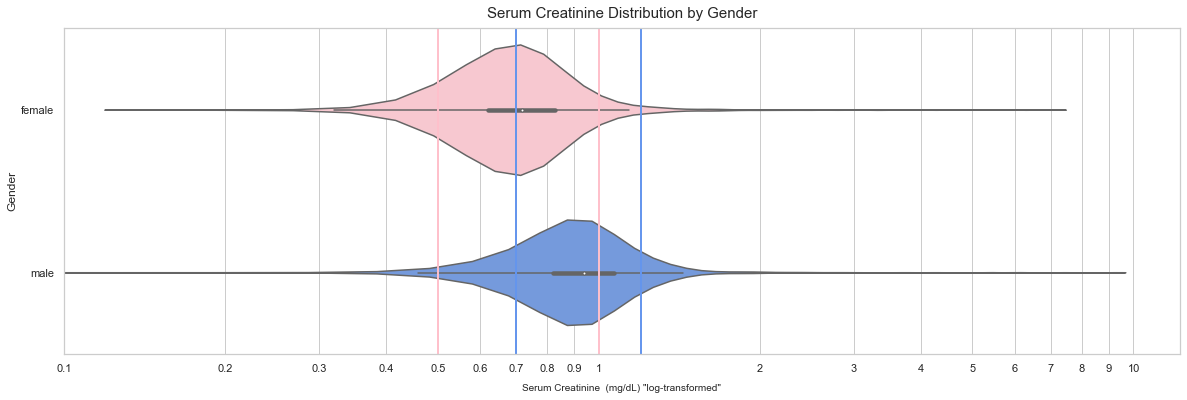

In [60]:
plt.figure(figsize=[20,6])

sb.violinplot(data=df, x='cr', y='gender', order=['female', 'male'], orient='horizontal', palette=['pink', 'cornflowerblue']);
plt.xscale('log')

plt.axvline(x= .5, linestyle='-', linewidth=2, color='pink', alpha=.99)
plt.axvline(x= 1, linestyle='-', linewidth=2, color='pink', alpha=.99)
plt.axvline(x= .7, linestyle='-', linewidth=2, color='cornflowerblue', alpha=.99)
plt.axvline(x= 1.2, linestyle='-', linewidth=2, color='cornflowerblue', alpha=.99)

ticks = [0.1, 0.2, 0.3, 0.4, .5, .6, .7, .8, .9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Serum Creatinine Distribution by Gender', pad=10, fontsize=15)
plt.xlabel('Serum Creatinine  (mg/dL) "log-transformed"', labelpad=10, fontsize=10)
plt.ylabel('Gender');
plt.xlim(.1);

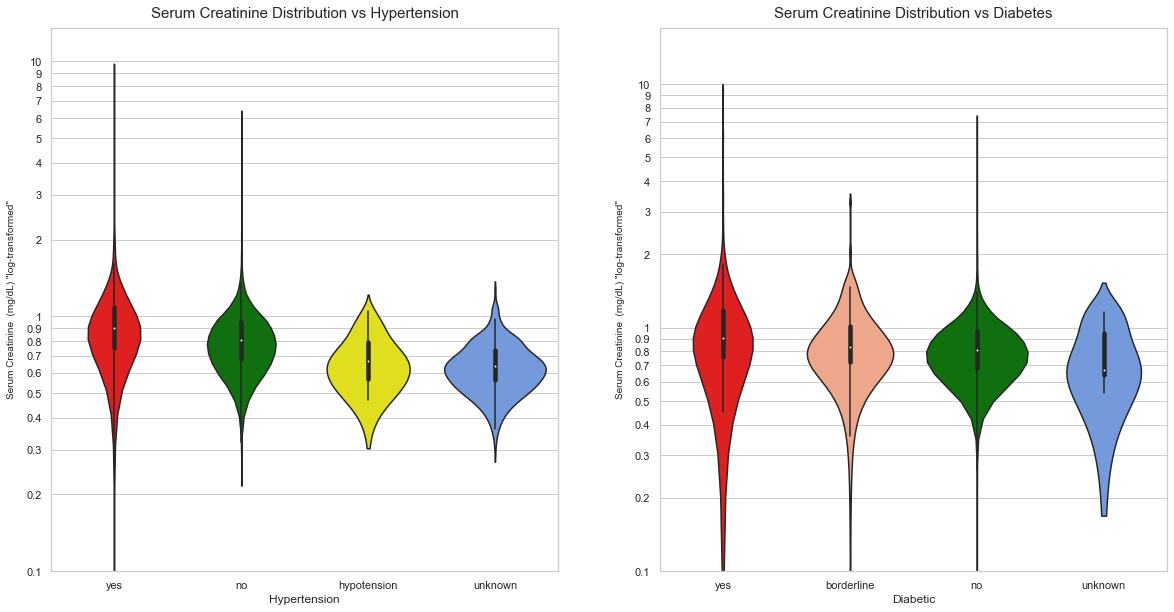

In [61]:
plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
sb.violinplot(data=df, y='cr', x='hypertension', palette=['red', 'green', 'yellow', 'cornflowerblue']);
plt.yscale('log')

ticks = [0.1, 0.2, 0.3, 0.4, .5, .6, .7, .8, .9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['{}'.format(v) for v in ticks]

plt.yticks(ticks, labels)
plt.title('Serum Creatinine Distribution vs Hypertension', pad=10, fontsize=15)
plt.ylabel('Serum Creatinine  (mg/dL) "log-transformed"', labelpad=10, fontsize=10)
plt.xlabel('Hypertension');
plt.ylim(.1)


plt.subplot(1,2,2)
sb.violinplot(data=df, y='cr', x='diabetes', palette=['red', 'lightsalmon', 'green', 'cornflowerblue']);
plt.yscale('log')

plt.yticks(ticks, labels)
plt.title('Serum Creatinine Distribution vs Diabetes', pad=10, fontsize=15)
plt.ylabel('Serum Creatinine  (mg/dL) "log-transformed"', labelpad=10, fontsize=10)
plt.xlabel('Diabetic')
plt.ylim(.1);

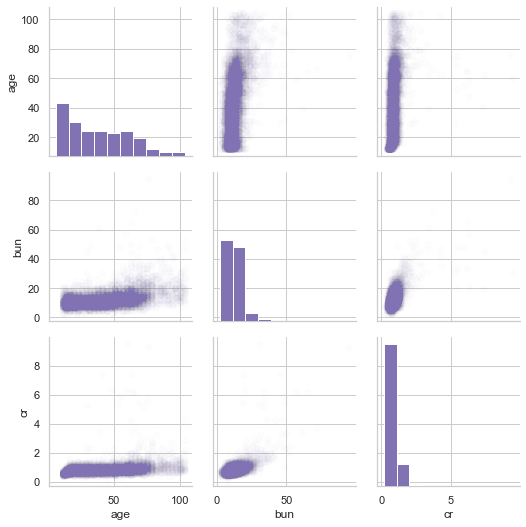

In [62]:
KFT_features = ['age', 'bun', 'cr']
g = sb.PairGrid(data=df, vars=KFT_features)
g.map_offdiag(plt.scatter, alpha=.01, color='m')
g.map_diag(plt.hist, color='m');

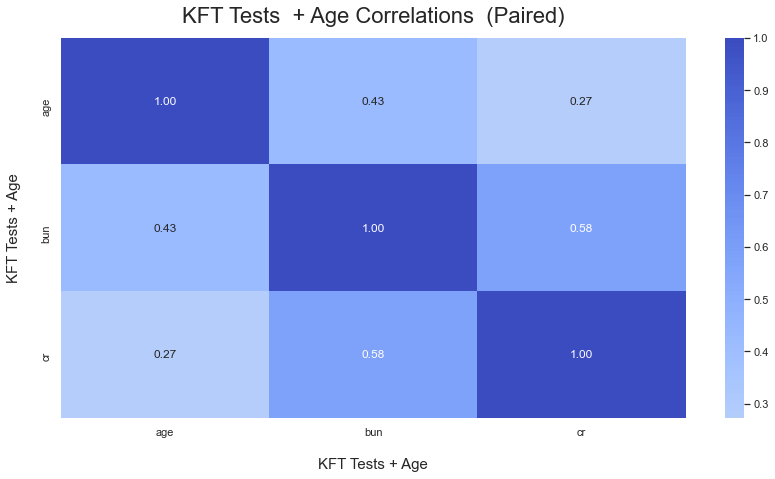

In [63]:
KFT_features = ['age', 'bun', 'cr']

plt.figure(figsize= [14,7])

correlations = df[KFT_features].corr()

sb.heatmap(correlations, cmap='coolwarm_r', annot=True, fmt='.2f', center = 0)

plt.title('KFT Tests  + Age Correlations  (Paired)', fontsize= 22, pad=15)
plt.xlabel('KFT Tests + Age', fontsize= 15, labelpad=20)
plt.ylabel('KFT Tests + Age', fontsize= 15, labelpad=20);

## 4- Comprehensive metabolic panel (CMP)

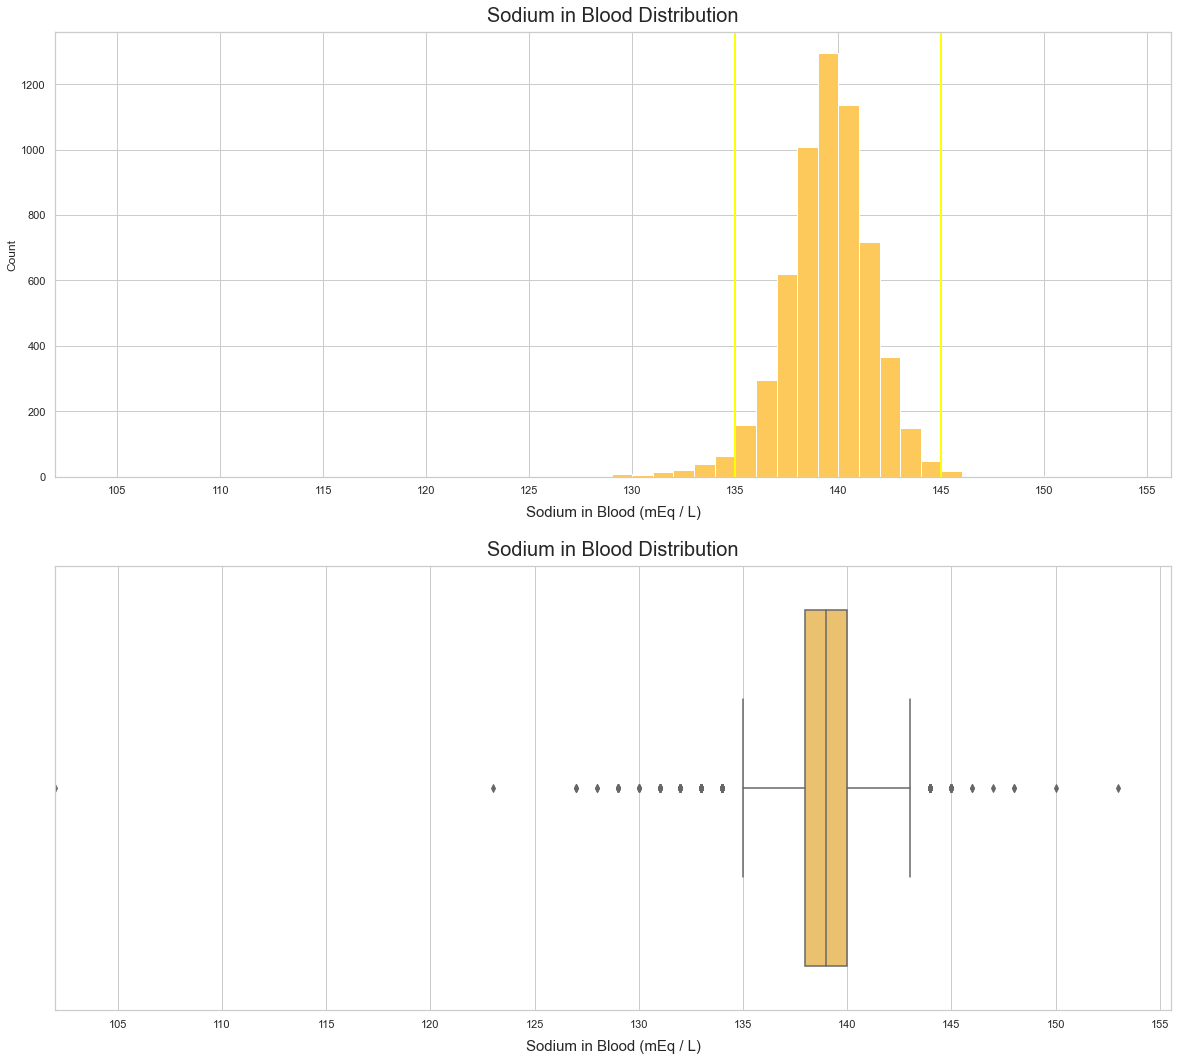

In [65]:
plt.figure(figsize=[20,18])

plt.subplot(2,1,1)
bins = np.arange(90, df.sodium.max()+1, 1)
plt.hist(data=df, x='sodium', bins= bins, color=sb.color_palette('YlOrBr', 30)[10])

plt.axvline(x= 135, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 145, linestyle='-', linewidth=2, color='yellow', alpha=.99)

ticks = np.arange(90, df.sodium.max()+5, 5)
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Sodium in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Sodium in Blood (mEq / L)', labelpad=10, fontsize=15)
plt.ylabel('Count');
plt.xlim(df.sodium.min(),);

plt.subplot(2,1,2)

sb.boxplot(data=df, x='sodium', color=sb.color_palette('YlOrBr', 30)[10])

plt.xticks(ticks, labels)
plt.title('Sodium in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Sodium in Blood (mEq / L)', labelpad=10, fontsize=15)
plt.ylabel('');
plt.xlim(df.sodium.min(),);

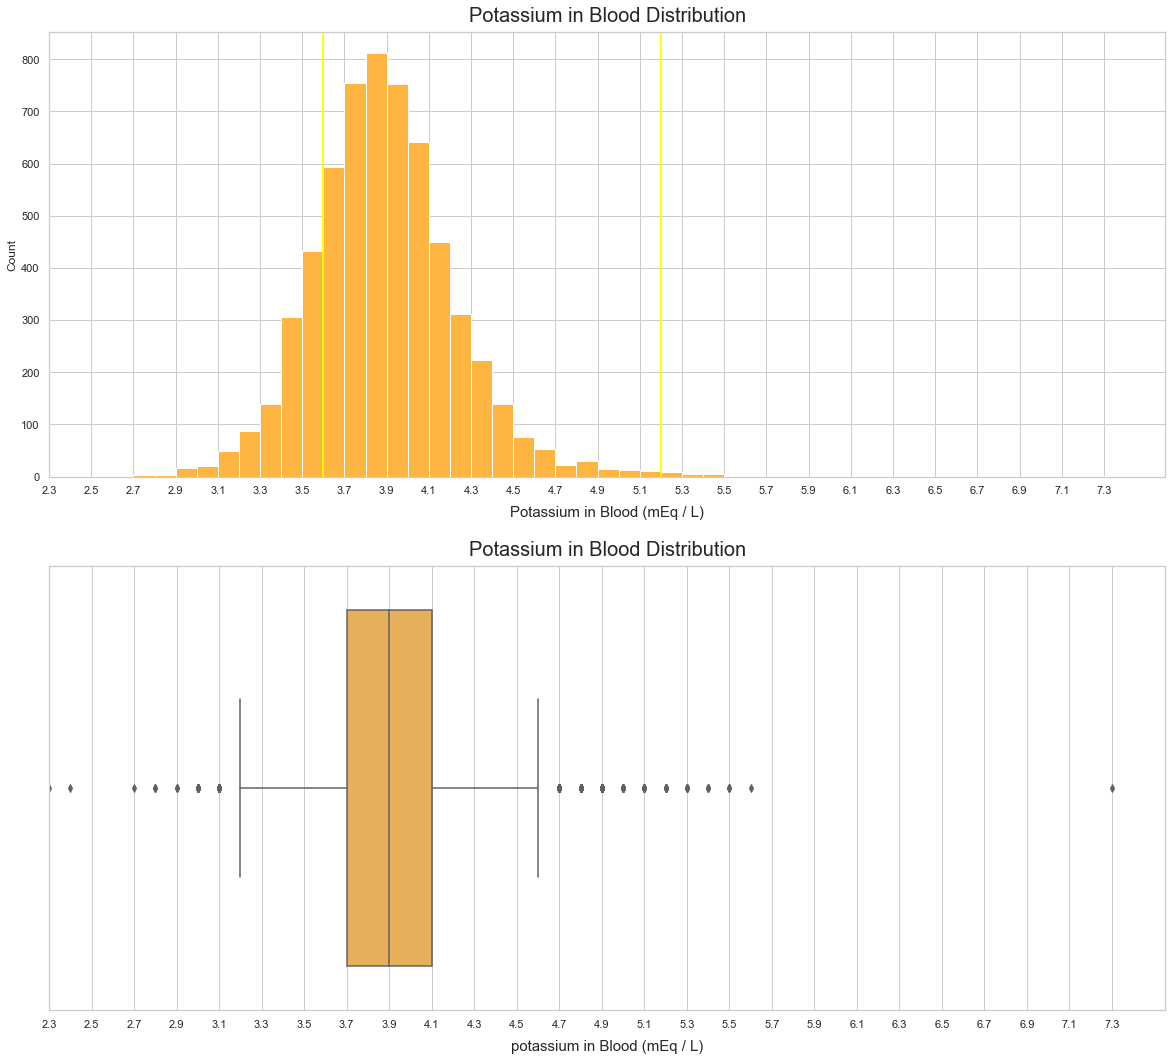

In [66]:
plt.figure(figsize=[20,18])

plt.subplot(2,1,1)
bins = np.arange(1.5, df.potassium.max()+.1, .1)
plt.hist(data=df, x='potassium', bins= bins, color=sb.color_palette('YlOrBr', 30)[12])

plt.axvline(x= 3.6, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 5.2, linestyle='-', linewidth=2, color='yellow', alpha=.99)

ticks = np.arange(1.5, df.potassium.max()+.2, .2)
labels = ['{:.1f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Potassium in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Potassium in Blood (mEq / L)', labelpad=10, fontsize=15)
plt.ylabel('Count');
plt.xlim(df.potassium.min(),);

plt.subplot(2,1,2)

sb.boxplot(data=df, x='potassium', color=sb.color_palette('YlOrBr', 30)[12])

plt.xticks(ticks, labels)
plt.title('Potassium in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('potassium in Blood (mEq / L)', labelpad=10, fontsize=15)
plt.ylabel('');
plt.xlim(df.potassium.min(),);

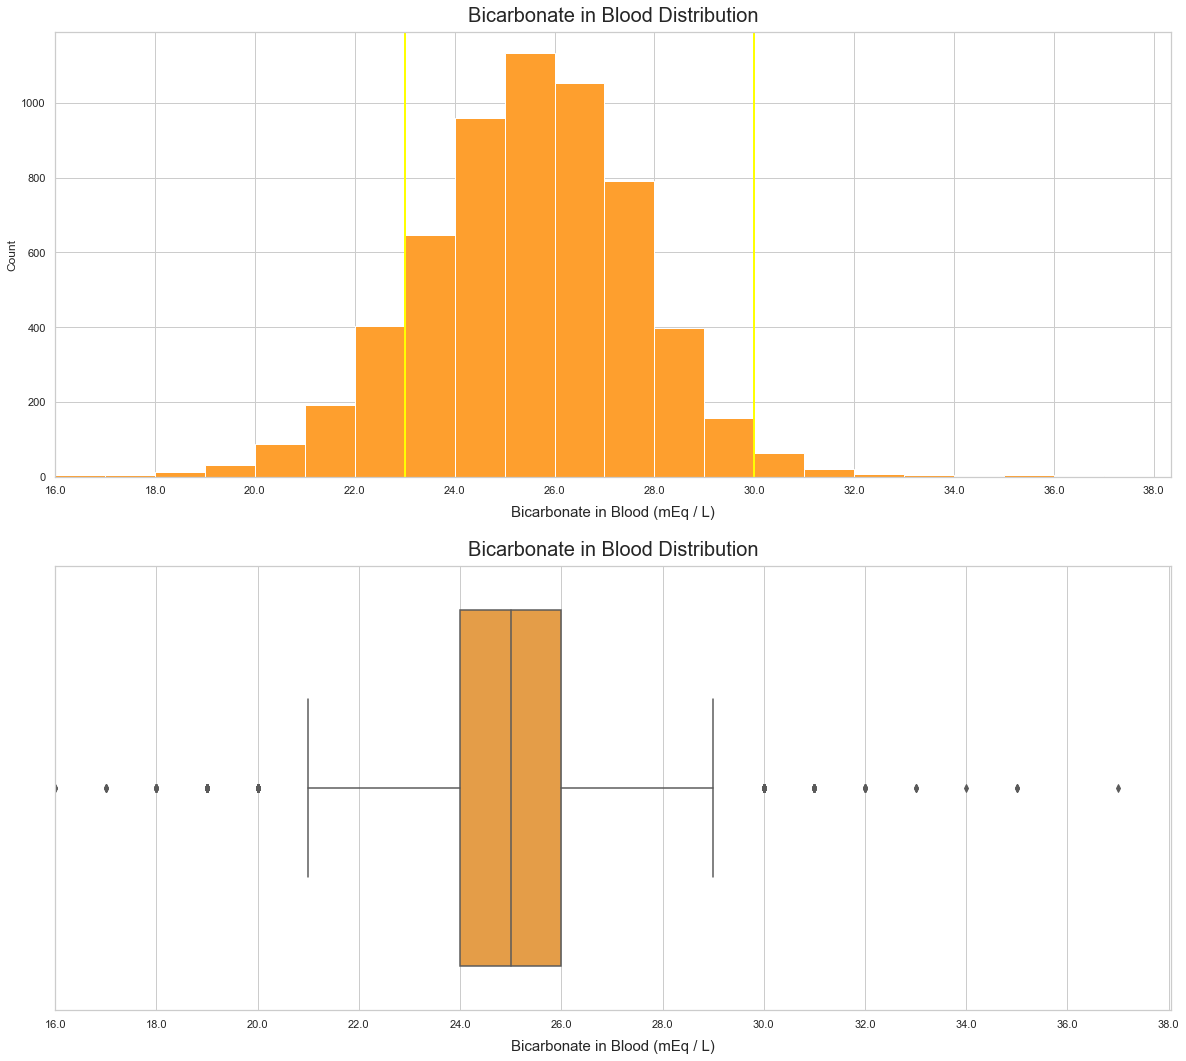

In [67]:
plt.figure(figsize=[20,18])

plt.subplot(2,1,1)
bins = np.arange(10, df.bicarb.max()+1, 1)
plt.hist(data=df, x='bicarb', bins= bins, color=sb.color_palette('YlOrBr', 30)[14])

plt.axvline(x= 23, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 30, linestyle='-', linewidth=2, color='yellow', alpha=.99)

ticks = np.arange(10, df.bicarb.max()+2, 2)
labels = ['{:.1f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Bicarbonate in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Bicarbonate in Blood (mEq / L)', labelpad=10, fontsize=15)
plt.ylabel('Count');
plt.xlim(df.bicarb.min(),);

plt.subplot(2,1,2)

sb.boxplot(data=df, x='bicarb', color=sb.color_palette('YlOrBr', 30)[14])

plt.xticks(ticks, labels)
plt.title('Bicarbonate in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Bicarbonate in Blood (mEq / L)', labelpad=10, fontsize=15)
plt.ylabel('');
plt.xlim(df.bicarb.min(),);

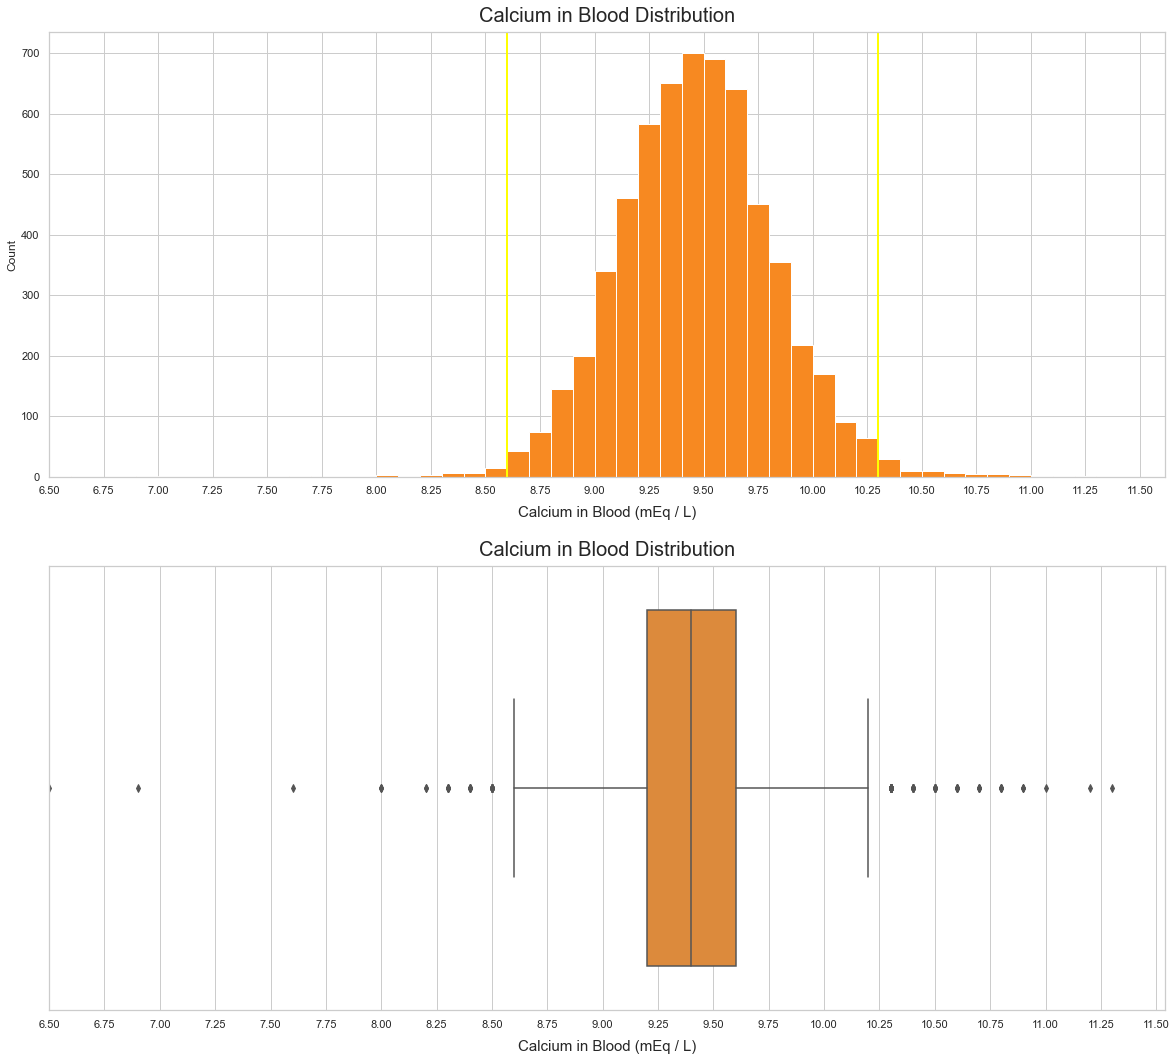

In [68]:
plt.figure(figsize=[20,18])

plt.subplot(2,1,1)
bins = np.arange(5, df.ca.max()+.1, .1)
plt.hist(data=df, x='ca', bins= bins, color=sb.color_palette('YlOrBr', 30)[16])

plt.axvline(x= 8.6, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 10.3, linestyle='-', linewidth=2, color='yellow', alpha=.99)

ticks = np.arange(5, df.ca.max()+.25, .25)
labels = ['{:.2f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Calcium in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Calcium in Blood (mEq / L)', labelpad=10, fontsize=15)
plt.ylabel('Count');
plt.xlim(df.ca.min(),);

plt.subplot(2,1,2)

sb.boxplot(data=df, x='ca', color=sb.color_palette('YlOrBr', 30)[16])

plt.xticks(ticks, labels)
plt.title('Calcium in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Calcium in Blood (mEq / L)', labelpad=10, fontsize=15)
plt.ylabel('');
plt.xlim(df.ca.min(),);

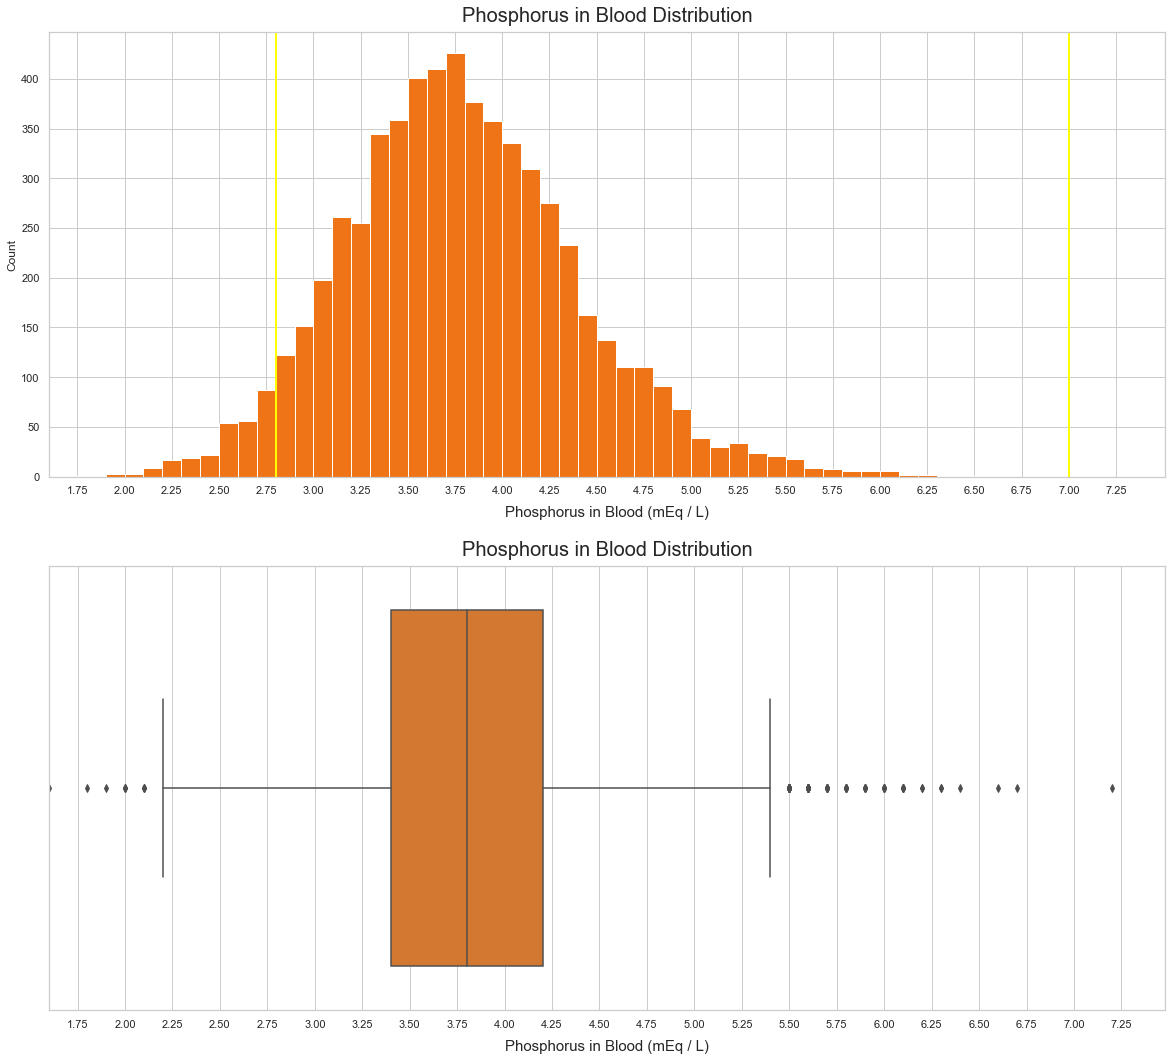

In [69]:
plt.figure(figsize=[20,18])

plt.subplot(2,1,1)
bins = np.arange(1, df.phos.max()+.1, .1)
plt.hist(data=df, x='phos', bins= bins, color=sb.color_palette('YlOrBr', 30)[18])

plt.axvline(x= 2.8, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 7, linestyle='-', linewidth=2, color='yellow', alpha=.99)

ticks = np.arange(1, df.phos.max()+.25, .25)
labels = ['{:.2f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Phosphorus in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Phosphorus in Blood (mEq / L)', labelpad=10, fontsize=15)
plt.ylabel('Count');
plt.xlim(df.phos.min(),);

plt.subplot(2,1,2)

sb.boxplot(data=df, x='phos', color=sb.color_palette('YlOrBr', 30)[18])

plt.xticks(ticks, labels)
plt.title('Phosphorus in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Phosphorus in Blood (mEq / L)', labelpad=10, fontsize=15)
plt.ylabel('');
plt.xlim(df.phos.min(),);

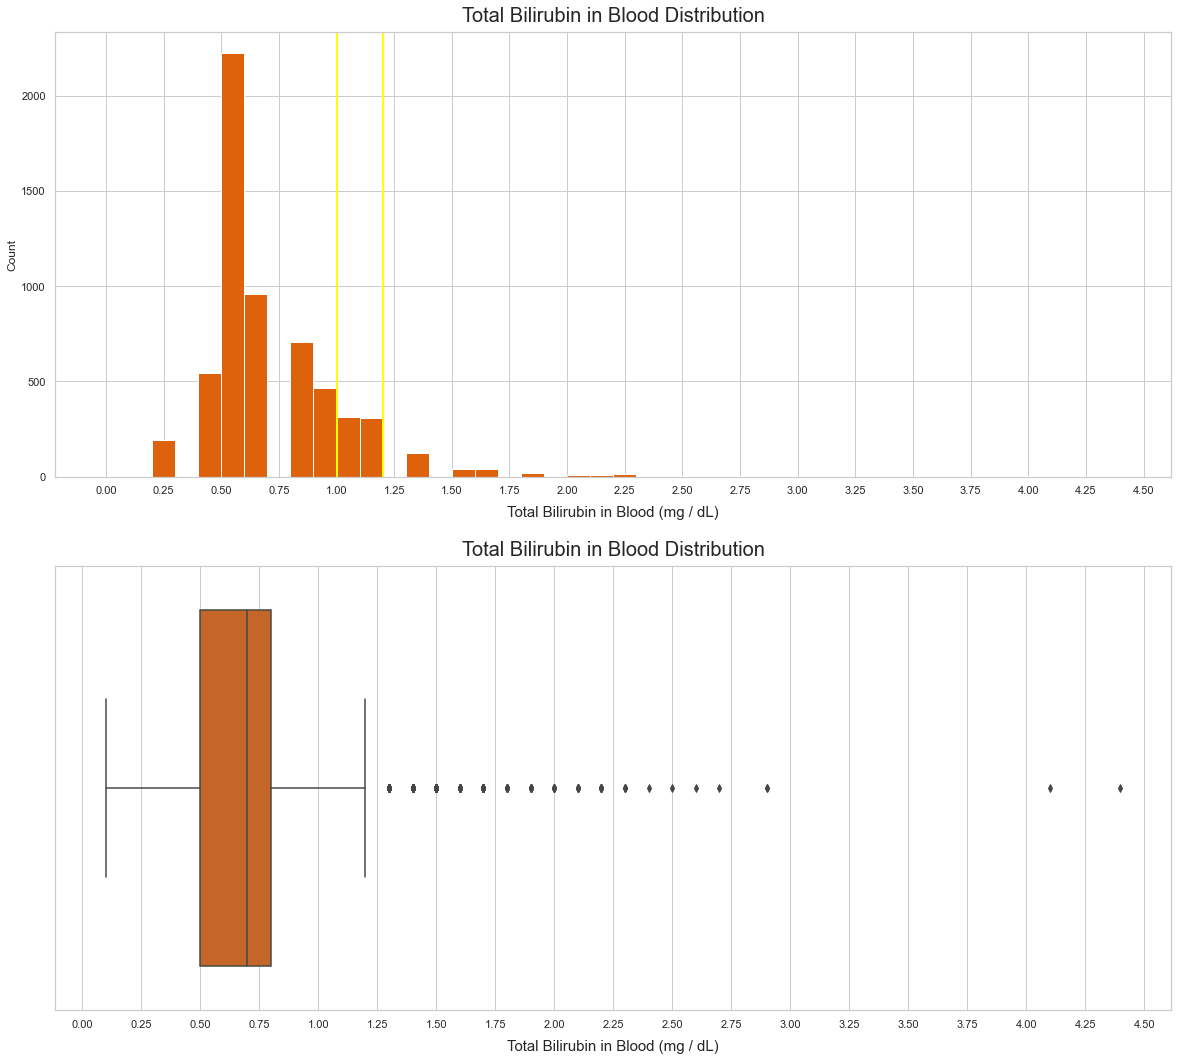

In [70]:
plt.figure(figsize=[20,18])

plt.subplot(2,1,1)
bins = np.arange(0, df.t_bilirubin.max()+.1, .1)
plt.hist(data=df, x='t_bilirubin', bins= bins, color=sb.color_palette('YlOrBr', 30)[20])

plt.axvline(x= 1, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 1.2, linestyle='-', linewidth=2, color='yellow', alpha=.99)

ticks = np.arange(0, df.t_bilirubin.max()+.25, .25)
labels = ['{:.2f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Total Bilirubin in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Total Bilirubin in Blood (mg / dL)', labelpad=10, fontsize=15)
plt.ylabel('Count');
#plt.xlim(df.t_bilirubin.min(),);

plt.subplot(2,1,2)

sb.boxplot(data=df, x='t_bilirubin', color=sb.color_palette('YlOrBr', 30)[20])

plt.xticks(ticks, labels)
plt.title('Total Bilirubin in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Total Bilirubin in Blood (mg / dL)', labelpad=10, fontsize=15)
plt.ylabel('');
#plt.xlim(df.t_bilirubin.min(),);

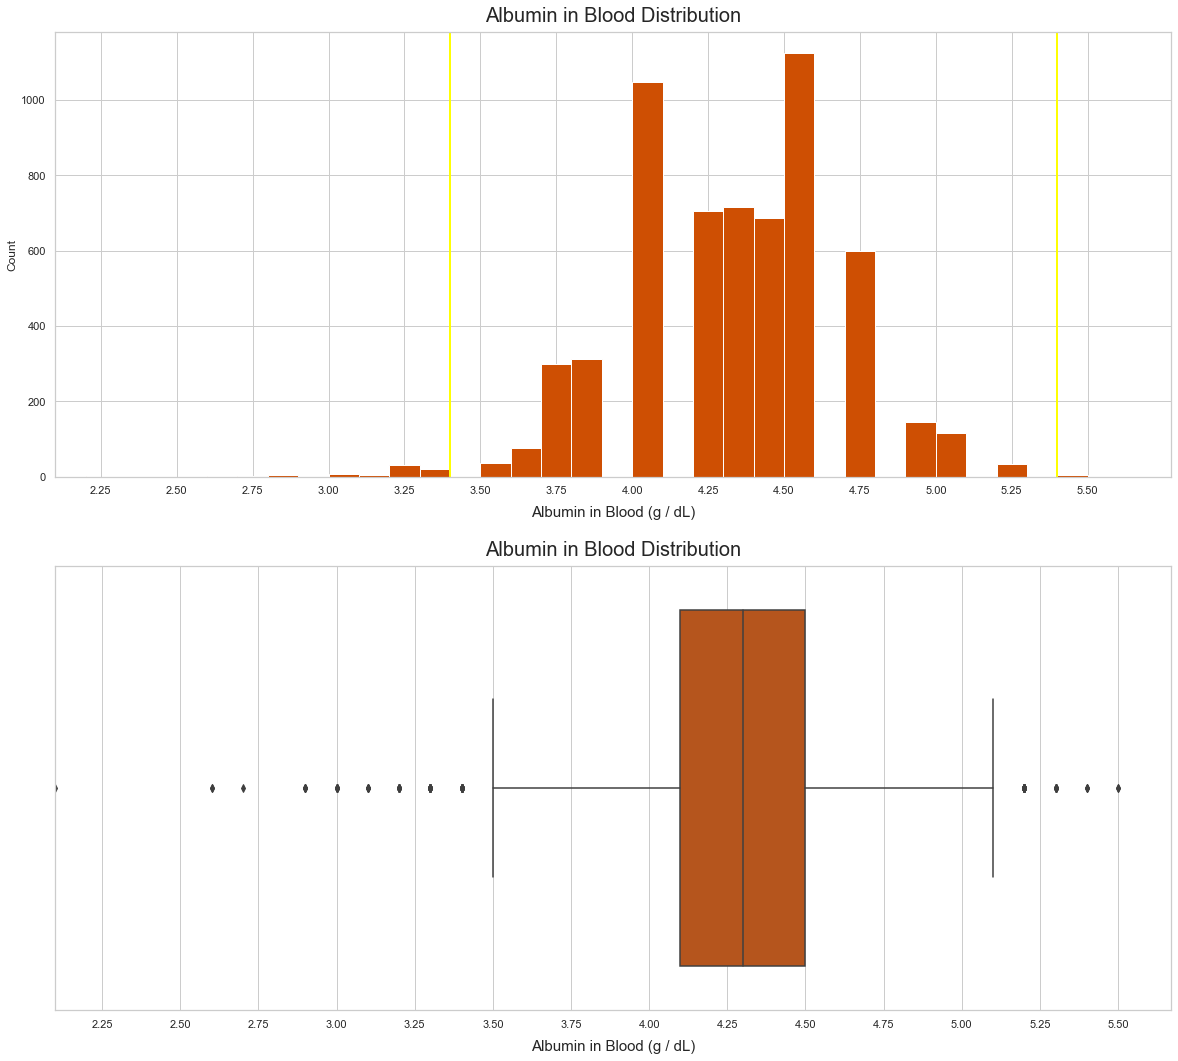

In [71]:
plt.figure(figsize=[20,18])

plt.subplot(2,1,1)
bins = np.arange(0, df.alb.max()+.1, .1)
plt.hist(data=df, x='alb', bins= bins, color=sb.color_palette('YlOrBr', 30)[22])

plt.axvline(x= 3.4, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 5.4, linestyle='-', linewidth=2, color='yellow', alpha=.99)

ticks = np.arange(1, df.alb.max()+.25, .25)
labels = ['{:.2f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Albumin in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Albumin in Blood (g / dL)', labelpad=10, fontsize=15)
plt.ylabel('Count');
plt.xlim(df.alb.min(),);

plt.subplot(2,1,2)

sb.boxplot(data=df, x='alb', color=sb.color_palette('YlOrBr', 30)[22])

plt.xticks(ticks, labels)
plt.title('Albumin in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Albumin in Blood (g / dL)', labelpad=10, fontsize=15)
plt.ylabel('');
plt.xlim(df.alb.min(),);

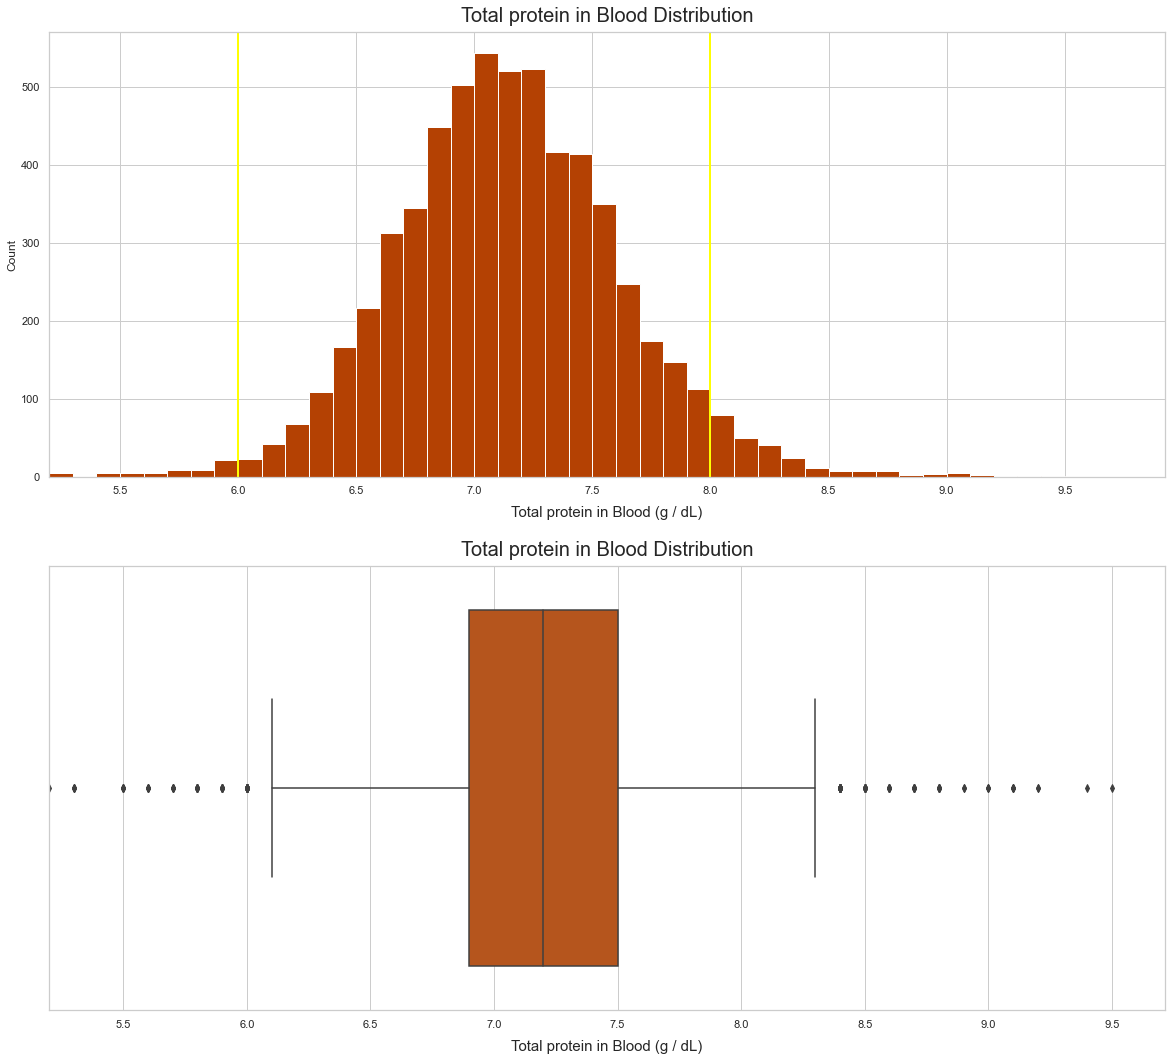

In [72]:
plt.figure(figsize=[20,18])

plt.subplot(2,1,1)
bins = np.arange(1, df.t_protein.max()+.1, .1)
plt.hist(data=df, x='t_protein', bins= bins, color=sb.color_palette('YlOrBr', 30)[24])

plt.axvline(x= 6, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 8, linestyle='-', linewidth=2, color='yellow', alpha=.99)

ticks = np.arange(1, df.t_protein.max()+.5, .5)
labels = ['{:.1f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Total protein in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Total protein in Blood (g / dL)', labelpad=10, fontsize=15)
plt.ylabel('Count');
plt.xlim(df.t_protein.min(),);

plt.subplot(2,1,2)

sb.boxplot(data=df, x='t_protein', color=sb.color_palette('YlOrBr', 30)[22])

plt.xticks(ticks, labels)
plt.title('Total protein in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Total protein in Blood (g / dL)', labelpad=10, fontsize=15)
plt.ylabel('');
plt.xlim(df.t_protein.min(),);

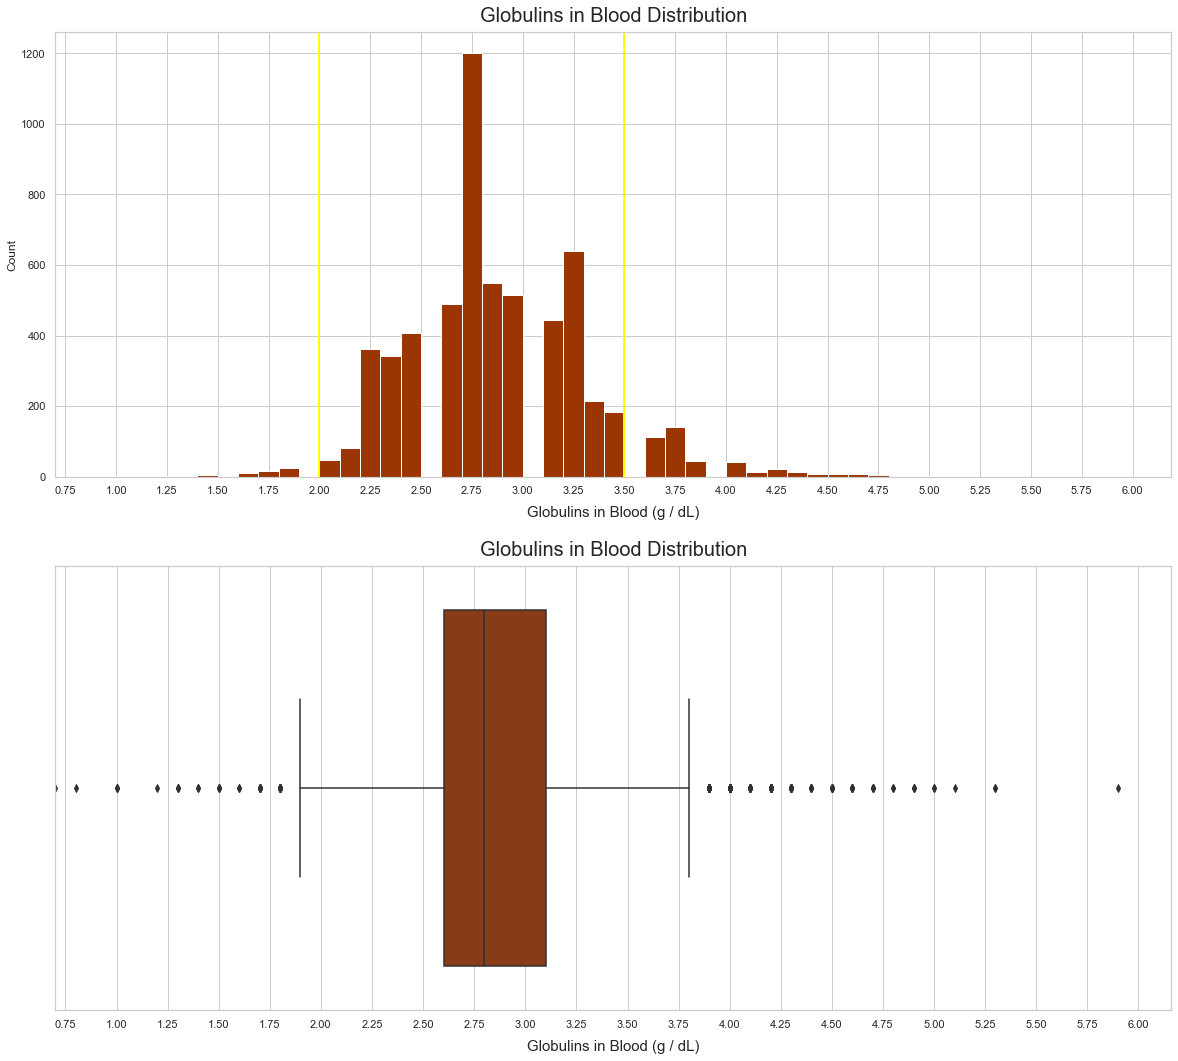

In [73]:
plt.figure(figsize=[20,18])

plt.subplot(2,1,1)
bins = np.arange(.1, df.glob.max()+.1, .1)
plt.hist(data=df, x='glob', bins= bins, color=sb.color_palette('YlOrBr', 30)[26])

plt.axvline(x= 2, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 3.5, linestyle='-', linewidth=2, color='yellow', alpha=.99)

ticks = np.arange(0, df.glob.max()+.25, .25)
labels = ['{:.2f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Globulins in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Globulins in Blood (g / dL)', labelpad=10, fontsize=15)
plt.ylabel('Count');
plt.xlim(df.glob.min(),);

plt.subplot(2,1,2)

sb.boxplot(data=df, x='glob', color=sb.color_palette('YlOrBr', 30)[26])

plt.xticks(ticks, labels)
plt.title('Globulins in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Globulins in Blood (g / dL)', labelpad=10, fontsize=15)
plt.ylabel('');
plt.xlim(df.glob.min(),);

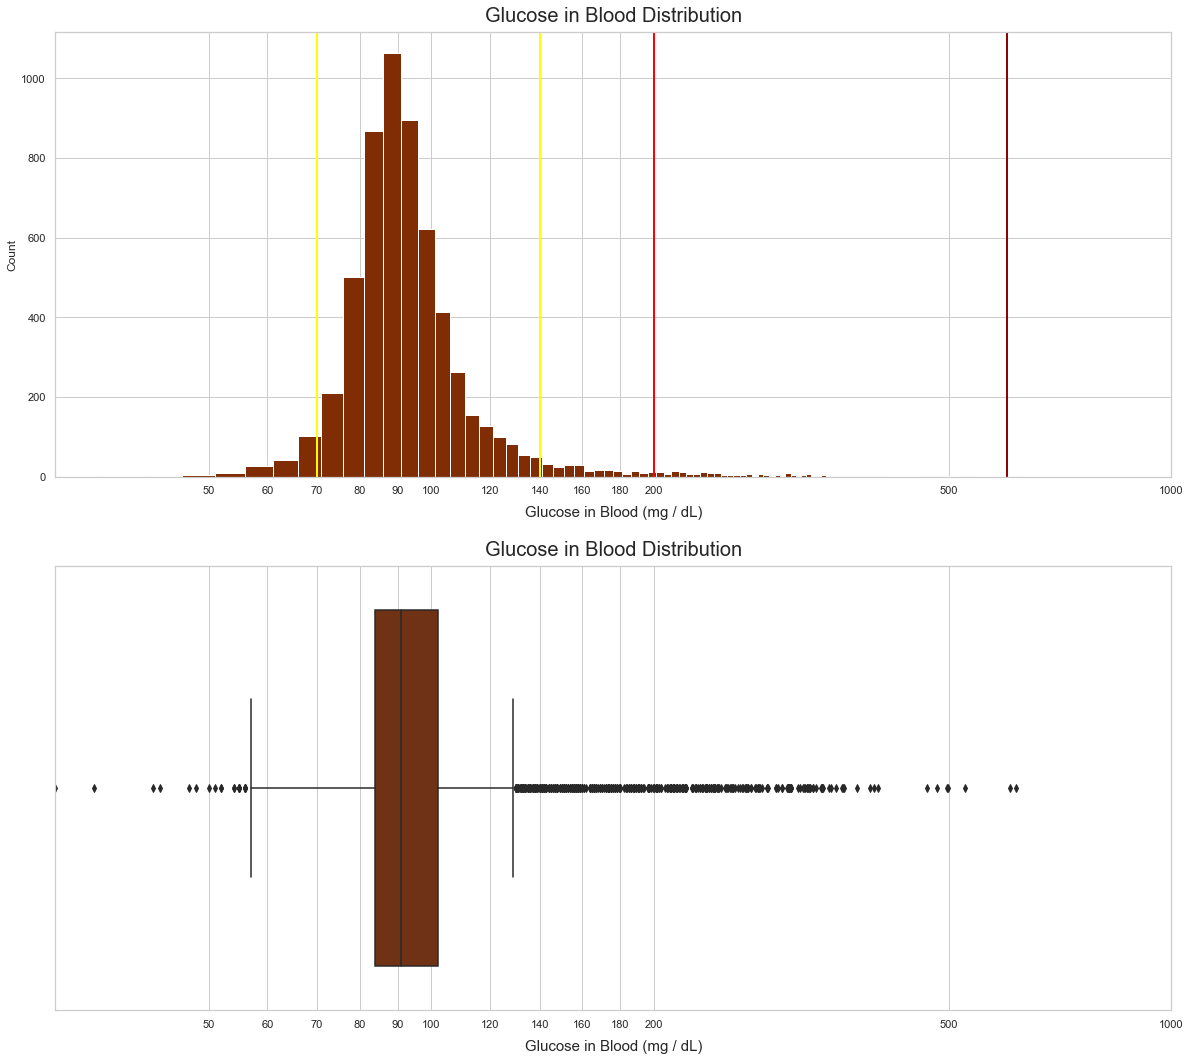

In [74]:
plt.figure(figsize=[20,18])

plt.subplot(2,1,1)
bins = np.arange(1, df.glucose.max()+5, 5)
plt.hist(data=df, x='glucose', bins= bins, color=sb.color_palette('YlOrBr', 30)[28])
plt.xscale('log')

plt.axvline(x= 70, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 140, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 200, linestyle='-', linewidth=2, color='red', alpha=.99)
plt.axvline(x= 600, linestyle='-', linewidth=2, color='darkred', alpha=.99)

ticks = [1,2,5,10,20,50,60,70,80,90,100,120,140,160,180,200,500,1000]
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Glucose in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Glucose in Blood (mg / dL)', labelpad=10, fontsize=15)
plt.ylabel('Count');
plt.xlim(df.glucose.min(),);

plt.subplot(2,1,2)

sb.boxplot(data=df, x='glucose', color=sb.color_palette('YlOrBr', 30)[28])
plt.xscale('log')

plt.xticks(ticks, labels)
plt.title('Glucose in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Glucose in Blood (mg / dL)', labelpad=10, fontsize=15)
plt.ylabel('');
plt.xlim(df.glucose.min(),);

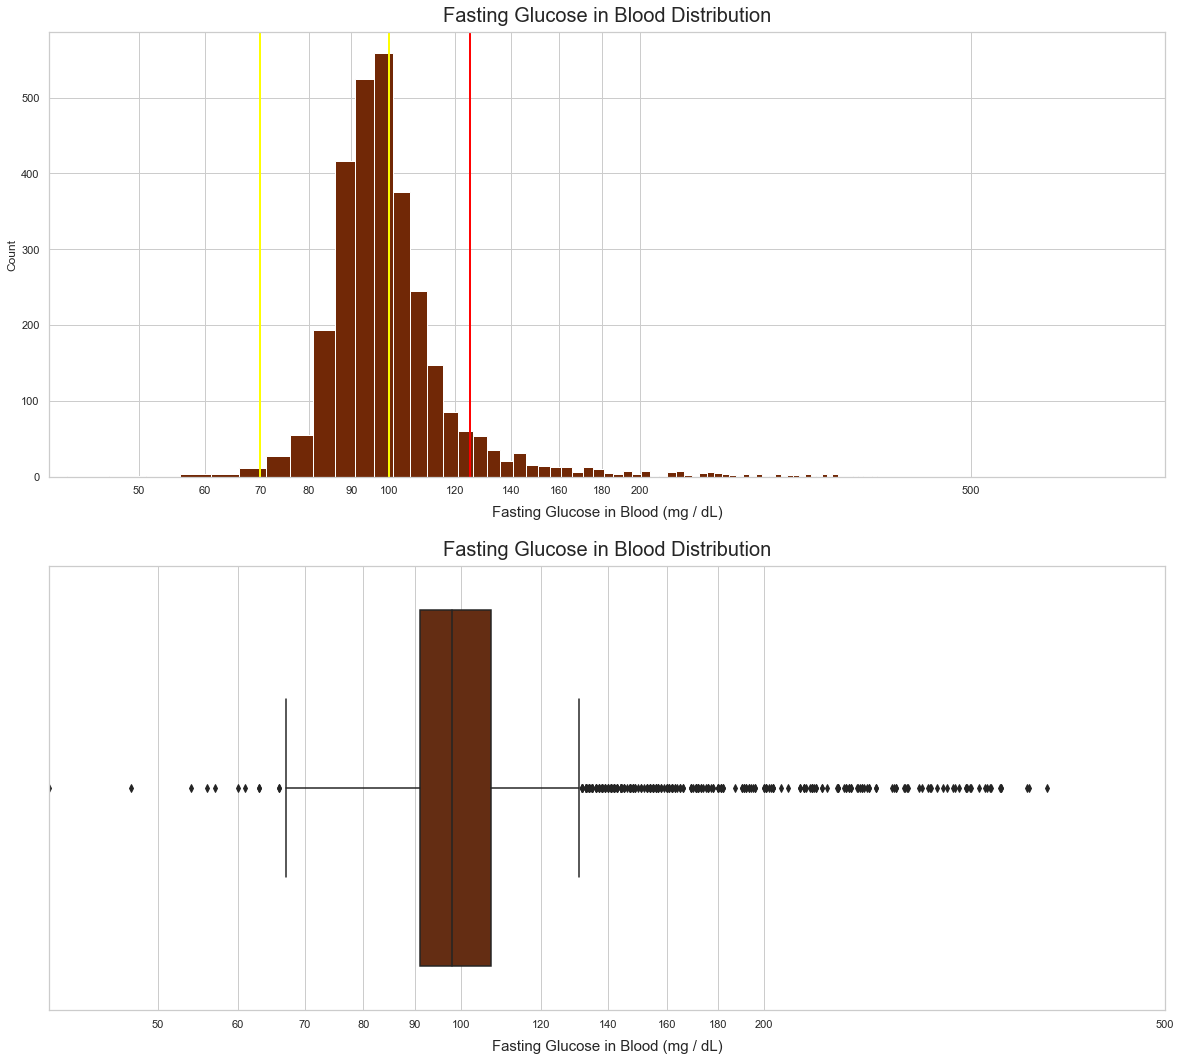

In [75]:
plt.figure(figsize=[20,18])

plt.subplot(2,1,1)
bins = np.arange(1, df.glucose.max()+5, 5)
plt.hist(data=df, x='glucose.1', bins= bins, color=sb.color_palette('YlOrBr', 31)[30])
plt.xscale('log')

plt.axvline(x= 70, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 100, linestyle='-', linewidth=2, color='yellow', alpha=.99)
plt.axvline(x= 125, linestyle='-', linewidth=2, color='red', alpha=.99)

ticks = [1,2,5,10,20,50,60,70,80,90,100,120,140,160,180,200,500]
labels = ['{:.0f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Fasting Glucose in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Fasting Glucose in Blood (mg / dL)', labelpad=10, fontsize=15)
plt.ylabel('Count');
plt.xlim(df['glucose.1'].min(),);

plt.subplot(2,1,2)

sb.boxplot(data=df, x='glucose.1', color=sb.color_palette('YlOrBr', 31)[30])
plt.xscale('log')

plt.xticks(ticks, labels)
plt.title('Fasting Glucose in Blood Distribution', pad=10, fontsize=20)
plt.xlabel('Fasting Glucose in Blood (mg / dL)', labelpad=10, fontsize=15)
plt.ylabel('');
plt.xlim(df['glucose.1'].min(),);

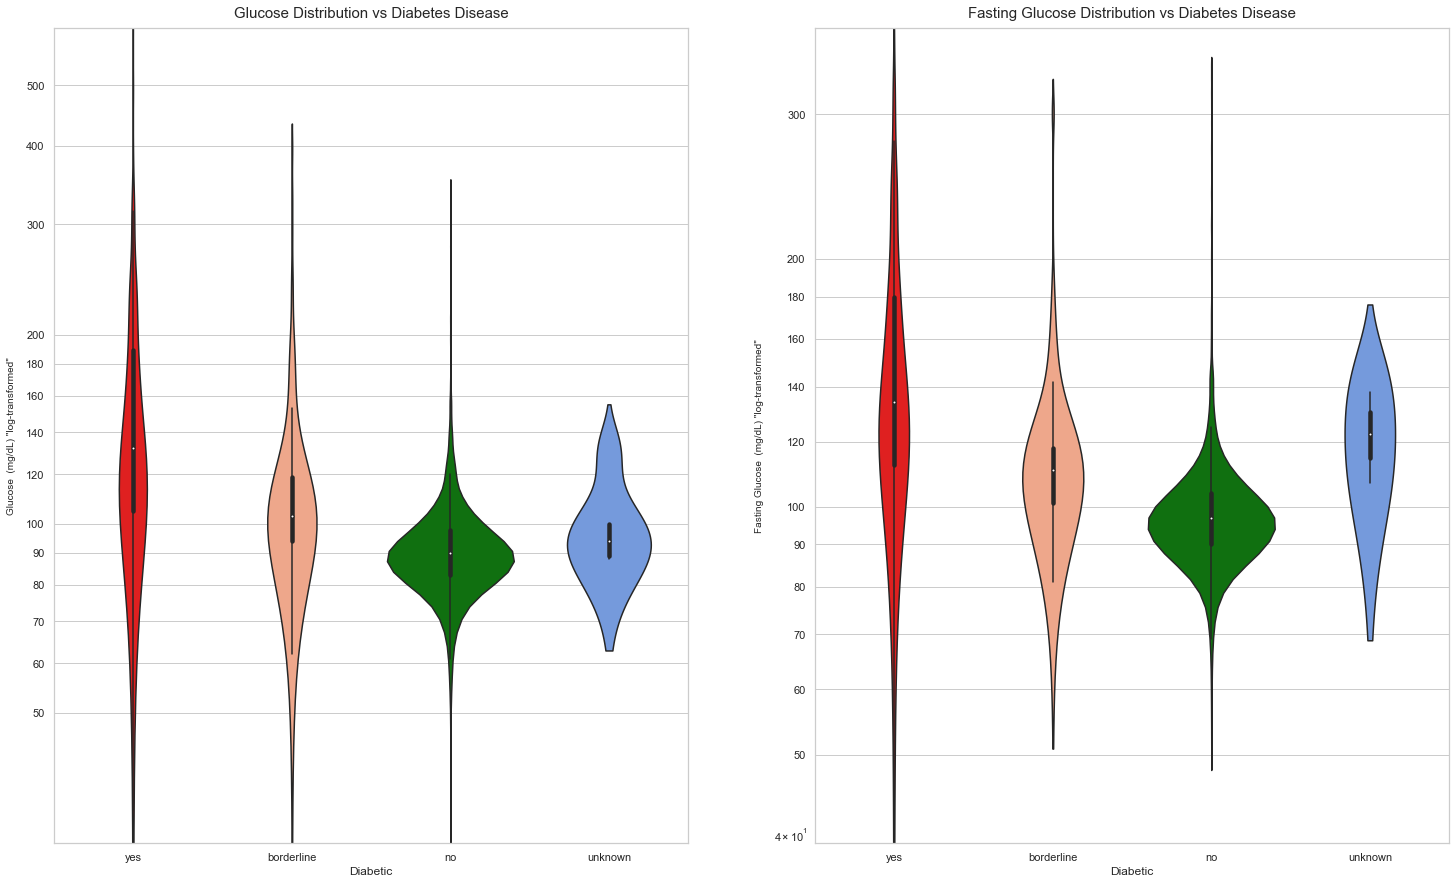

In [76]:
plt.figure(figsize=[25,15])

plt.subplot(1,2,1)
sb.violinplot(data=df, y='glucose', x='diabetes', palette=['red', 'lightsalmon', 'green', 'cornflowerblue']);
plt.yscale('log')

ticks = [1,2,5,10,20,50,60,70,80,90,100,120,140,160,180,200, 300, 400,500,1000]
labels = ['{}'.format(v) for v in ticks]

plt.yticks(ticks, labels)
plt.title('Glucose Distribution vs Diabetes Disease', pad=10, fontsize=15)
plt.ylabel('Glucose  (mg/dL) "log-transformed"', labelpad=10, fontsize=10)
plt.xlabel('Diabetic');
plt.ylim(df['glucose'].min(),df['glucose'].max());


plt.subplot(1,2,2)
sb.violinplot(data=df, y='glucose.1', x='diabetes', palette=['red', 'lightsalmon', 'green', 'cornflowerblue']);
plt.yscale('log')

ticks = [1,2,5,10,20,50,60,70,80,90,100,120,140,160,180,200,300,400,500]
labels = ['{}'.format(v) for v in ticks]

plt.yticks(ticks, labels)
plt.title('Fasting Glucose Distribution vs Diabetes Disease', pad=10, fontsize=15)
plt.ylabel('Fasting Glucose  (mg/dL) "log-transformed"', labelpad=10, fontsize=10)
plt.xlabel('Diabetic')
plt.ylim(df['glucose.1'].min(),df['glucose.1'].max());

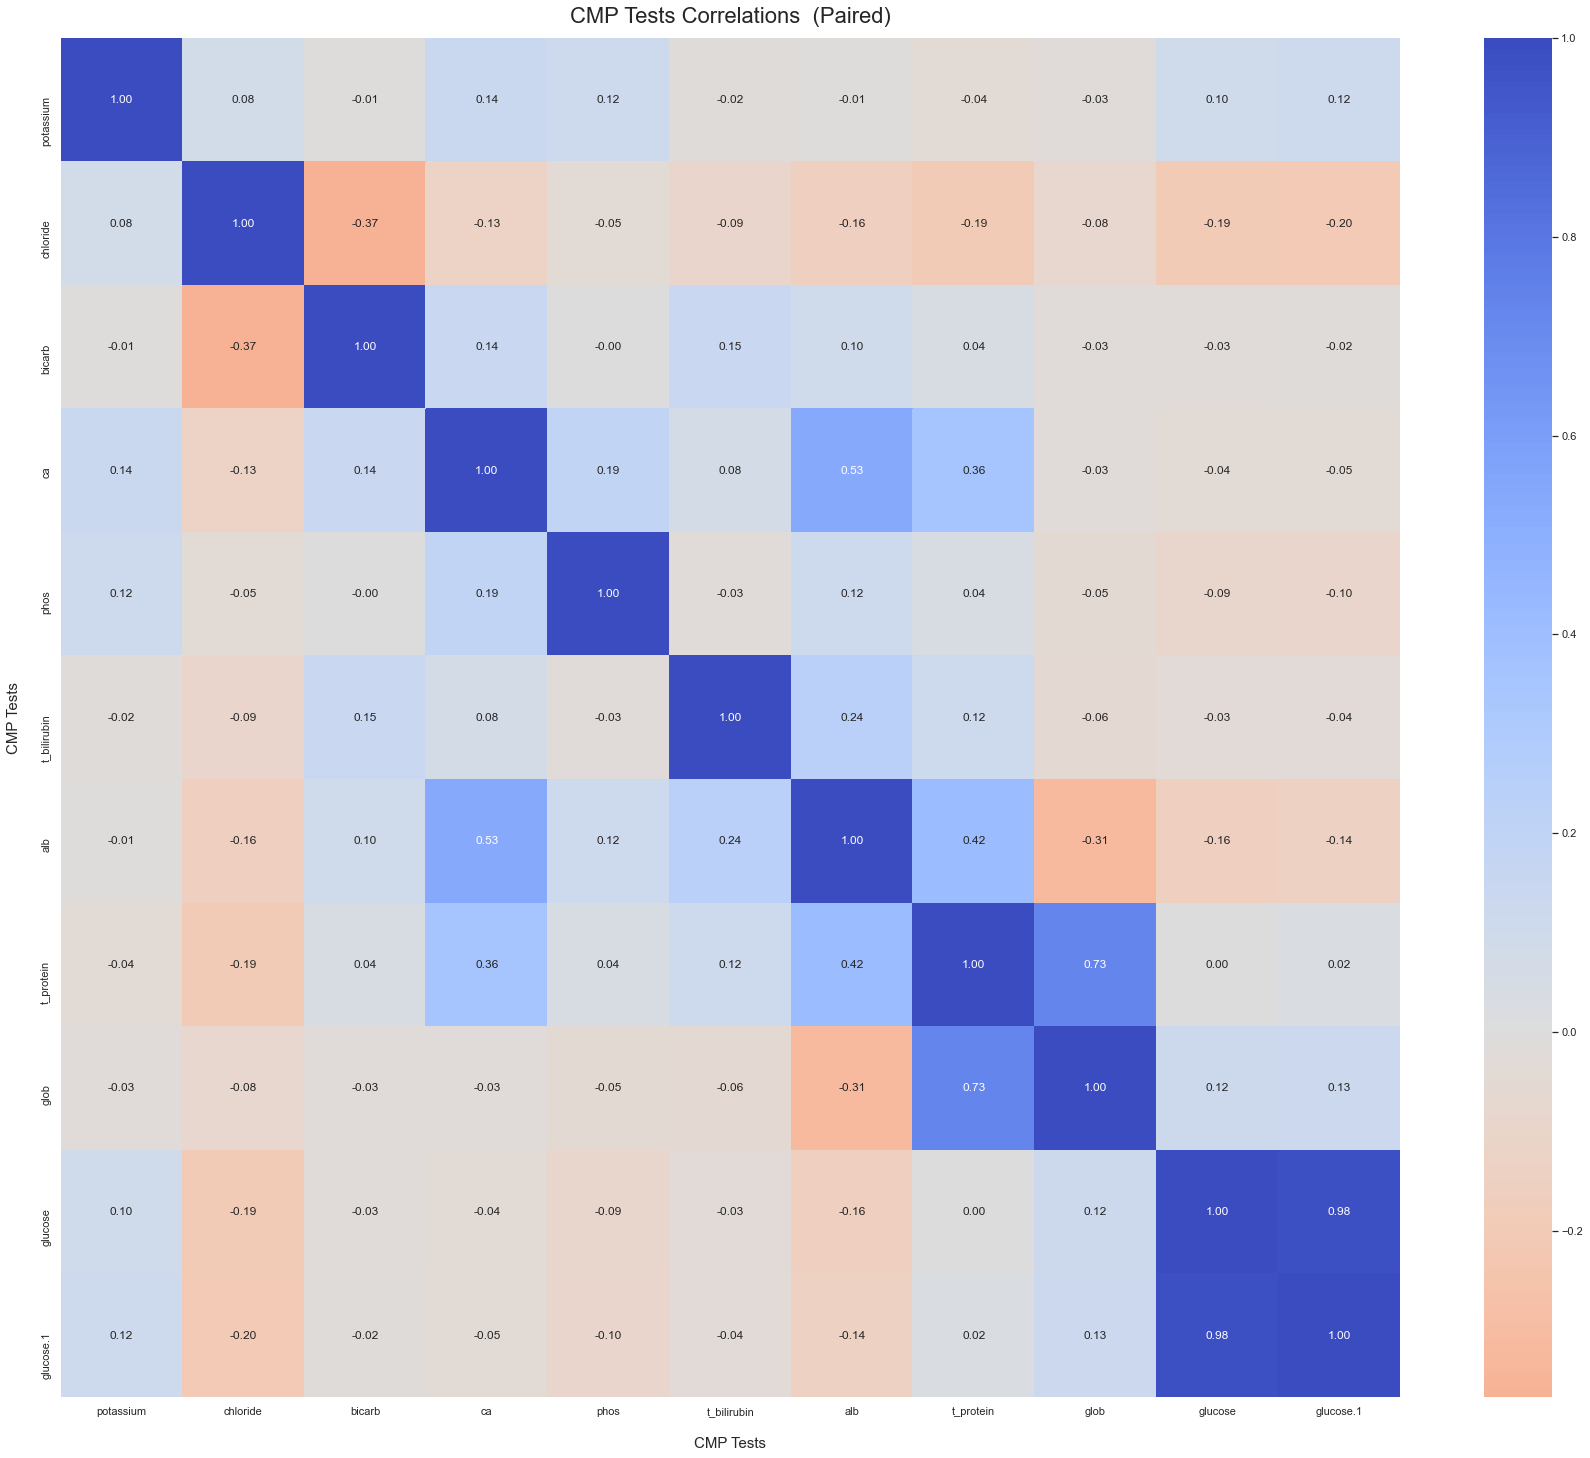

In [77]:
CMP_features = ['potassium', 'chloride', 'bicarb', 'ca', 'phos', 't_bilirubin', 'alb', 
                't_protein', 'glob', 'glucose', 'glucose.1',]

plt.figure(figsize= [30,25])

correlations = df[CMP_features].corr()

sb.heatmap(correlations, cmap='coolwarm_r', annot=True, fmt='.2f', center = 0)

plt.title('CMP Tests Correlations  (Paired)', fontsize= 22, pad=15)
plt.xlabel('CMP Tests', fontsize= 15, labelpad=20)
plt.ylabel('CMP Tests', fontsize= 15, labelpad=20);